## Part 1: Install and Import Necessary Modules

In [1]:
##dont always need to run
!pip install plotnine
!pip install matplotlib==3.8.3
##need this for ggplot thingsss
!pip install scikit-misc
## need scikit-misc for loess calc in ggplot statsmooth
!pip install seaborn
## need for seaborn sns plots
!pip install --upgrade seaborn matplotlib
## correlation matrix does not work with the old matplotlib, but I also want my ggplot to work

  Using cached plotnine-0.14.5-py3-none-any.whl.metadata (9.3 kB)
  Using cached matplotlib-3.10.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached pandas-2.2.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (89 kB)
  Using cached mizani-0.13.3-py3-none-any.whl.metadata (4.8 kB)
  Using cached numpy-2.2.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached numpy-1.26.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached plotnine-0.14.5-py3-none-any.whl (1.3 MB)
Using cached matplotlib-3.10.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (8.6 MB)
Using cached mizani-0.13.3-py3-none-any.whl (127 kB)
Using cached pandas-2.2.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.1 MB)
Using cached numpy-1.26.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
  Attempting uninstall: numpy
    Found existing inst

  Using cached matplotlib-3.10.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached matplotlib-3.10.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (8.6 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.8.3
    Uninstalling matplotlib-3.8.3:
      Successfully uninstalled matplotlib-3.8.3
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from plotnine import *
from plotnine.data import *
from skmisc import *
import seaborn as sns
import re
import math
import warnings 
warnings.filterwarnings('ignore') 

## Part 2: Import Data

In [2]:
kelp_rcca = pd.read_csv('Algae_California_raw_2024.csv')
kelp_rcca

Site   Latitude   Longitude  Year        Date  Depth_ft  \
0          120 Reef  33.737919 -118.392014  2006  2006-10-01      28.0   
1          120 Reef  33.737919 -118.392014  2006  2006-10-01      28.0   
2          120 Reef  33.737919 -118.392014  2006  2006-10-01      28.0   
3          120 Reef  33.737919 -118.392014  2006  2006-10-01      28.0   
4          120 Reef  33.737919 -118.392014  2006  2006-10-01      28.0   
...             ...        ...         ...   ...         ...       ...   
110130  Yellowbanks  33.998798 -119.550499  2013  2013-11-07      22.0   
110131  Yellowbanks  33.998798 -119.550499  2013  2013-11-07      22.0   
110132  Yellowbanks  33.998798 -119.550499  2013  2013-11-07      22.0   
110133  Yellowbanks  33.998798 -119.550499  2013  2013-11-07      22.0   
110134  Yellowbanks  33.998798 -119.550499  2013  2013-11-07      22.0   

        Transect              Classcode  Amount  Stipes  Distance  
0              1              Bull Kelp       0     NaN      30.0  
1              1             Giant Kelp       0     0.0      30.0  
2              1          Laminaria Spp       0     NaN      30.0  
3              1  Southern Sea Palm >30       0     NaN      30.0  
4              1             Woody Kelp       0     NaN      30.0  
...          ...                    ...     ...     ...       ...  
110130         6             Giant Kelp       1    15.0      30.0  
110131         6             Giant Kelp       1    22.0      30.0  
110132         6          Laminaria Spp       5     NaN      30.0  
110133         6  Southern Sea Palm >30       0     NaN      30.0  
110134         6             Woody Kelp      50     NaN      28.0  

[110135 rows x 11 columns]

## Part 3: EDA
### Check Point 1: Data Frames and Sites

In [3]:
kelp_rcca['Area_m2'] = kelp_rcca.Distance * 2
kelp_rcca.Date = pd.to_datetime(kelp_rcca.Date)
kelp_rcca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110135 entries, 0 to 110134
Data columns (total 12 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Site       110135 non-null  object        
 1   Latitude   110135 non-null  float64       
 2   Longitude  110135 non-null  float64       
 3   Year       110135 non-null  int64         
 4   Date       110135 non-null  datetime64[ns]
 5   Depth_ft   107885 non-null  float64       
 6   Transect   110135 non-null  int64         
 7   Classcode  110135 non-null  object        
 8   Amount     110135 non-null  int64         
 9   Stipes     55977 non-null   float64       
 10  Distance   110125 non-null  float64       
 11  Area_m2    110125 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(3), object(2)
memory usage: 10.1+ MB


**To calculate the density of kelp species, it is best to use either the stipes or the amount of holdfasts counted in the transect depending on the species**

In [4]:
kelp_rcca.isna().sum()

Site             0
Latitude         0
Longitude        0
Year             0
Date             0
Depth_ft      2250
Transect         0
Classcode        0
Amount           0
Stipes       54158
Distance        10
Area_m2         10
dtype: int64

In [5]:
kelp_rcca.groupby('Classcode')['Stipes'].count()

Classcode
Bull Kelp                    0
Feather Boa Kelp          4992
Giant Kelp               50985
Laminaria Spp                0
No Blade Kelp                0
Oar Kelp                     0
Sargassum Horneri            0
Southern Sea Palm <30        0
Southern Sea Palm >30        0
Torn Kelp                    0
Woody Kelp                   0
Name: Stipes, dtype: int64

**We can see here there the only species that this will concern are feather boa kelp and giant kelp**

**But are they even in our sites of interest?**

**First need to make dataframe for sites of interest, then need to identify items with counts**

**Best to start similarly as Analysis 1: Invert, and first make all dataframes for sites of Interest, then investigate species**

In [6]:
ftbrgg_kelp_rcca = kelp_rcca[(kelp_rcca.Latitude<= 40) & (kelp_rcca.Latitude>=39)]
ftbrgg_kelp_rcca.head(3)

Site  Latitude  Longitude  Year       Date  Depth_ft  Transect  \
2538  Albion Cove  39.22778 -123.77261  2018 2018-05-08      21.0         1   
2539  Albion Cove  39.22778 -123.77261  2018 2018-05-08      21.0         1   
2540  Albion Cove  39.22778 -123.77261  2018 2018-05-08      21.0         1   

             Classcode  Amount  Stipes  Distance  Area_m2  
2538         Bull Kelp       0     NaN      30.0     60.0  
2539  Feather Boa Kelp       0     0.0      30.0     60.0  
2540        Giant Kelp       0     0.0      30.0     60.0

In [7]:
ftbrgg_kelp_rcca.Site.unique()
## Same sites as invert

array(['Albion Cove', 'Caspar North', 'Caspar South', 'Frolic Cove',
       'Glass Beach', 'MacKerricher North', 'Mendocino Headlands',
       'Portuguese Beach', 'Russian Gulch', 'Van Damme'], dtype=object)

In [8]:
caspar_kelp = kelp_rcca[kelp_rcca.Site.str.contains('Caspar')]
caspar_kelp.head(3)

Site   Latitude   Longitude  Year       Date  Depth_ft  \
18593  Caspar North  39.364647 -123.822133  2014 2014-09-06      34.0   
18594  Caspar North  39.364647 -123.822133  2014 2014-09-06      34.0   
18595  Caspar North  39.364647 -123.822133  2014 2014-09-06      34.0   

       Transect      Classcode  Amount  Stipes  Distance  Area_m2  
18593         1      Bull Kelp       0     NaN      30.0     60.0  
18594         1     Giant Kelp       0     0.0      30.0     60.0  
18595         1  Laminaria Spp       0     NaN      30.0     60.0

In [9]:
caspar_north_kelp = kelp_rcca[kelp_rcca.Site.str.contains('Caspar North')]
caspar_north_kelp.head(3)

Site   Latitude   Longitude  Year       Date  Depth_ft  \
18593  Caspar North  39.364647 -123.822133  2014 2014-09-06      34.0   
18594  Caspar North  39.364647 -123.822133  2014 2014-09-06      34.0   
18595  Caspar North  39.364647 -123.822133  2014 2014-09-06      34.0   

       Transect      Classcode  Amount  Stipes  Distance  Area_m2  
18593         1      Bull Kelp       0     NaN      30.0     60.0  
18594         1     Giant Kelp       0     0.0      30.0     60.0  
18595         1  Laminaria Spp       0     NaN      30.0     60.0

In [10]:
caspar_south_kelp = kelp_rcca[kelp_rcca.Site.str.contains('Caspar South')]
caspar_south_kelp.head(3)

Site   Latitude   Longitude  Year       Date  Depth_ft  \
19531  Caspar South  39.361729 -123.822449  2008 2008-10-11      16.5   
19532  Caspar South  39.361729 -123.822449  2008 2008-10-11      16.5   
19533  Caspar South  39.361729 -123.822449  2008 2008-10-11      16.5   

       Transect      Classcode  Amount  Stipes  Distance  Area_m2  
19531         1      Bull Kelp      73     NaN      30.0     60.0  
19532         1     Giant Kelp       0     0.0      30.0     60.0  
19533         1  Laminaria Spp       4     NaN      30.0     60.0

**Analysis 1 showed that Portuguese Beach had similar biodiversity to Caspar before and after MHWs. Will be including it in initial analysis, with the prediction that the kelp will also show similarities.**

In [11]:
port_kelp = kelp_rcca[kelp_rcca.Site.str.contains('Portuguese')]
port_kelp.head(3)

Site   Latitude   Longitude  Year       Date  Depth_ft  \
83150  Portuguese Beach  39.302264 -123.803283  2007 2007-10-07      29.0   
83151  Portuguese Beach  39.302264 -123.803283  2007 2007-10-07      29.0   
83152  Portuguese Beach  39.302264 -123.803283  2007 2007-10-07      29.0   

       Transect      Classcode  Amount  Stipes  Distance  Area_m2  
83150         1      Bull Kelp      17     NaN      30.0     60.0  
83151         1     Giant Kelp       0     0.0      30.0     60.0  
83152         1  Laminaria Spp      50     NaN      30.0     60.0

In [12]:
kelp_rcca_species = set(kelp_rcca[kelp_rcca.Amount!=0].Classcode.unique())

caspar_kelp_species = set(caspar_kelp[caspar_kelp.Amount!=0].Classcode.unique())

caspar_north_kelp_species = set(caspar_north_kelp[caspar_kelp.Amount!=0].Classcode.unique())

caspar_south_kelp_species = set(caspar_south_kelp[caspar_kelp.Amount!=0].Classcode.unique())

port_kelp_species = set(port_kelp[port_kelp.Amount!=0].Classcode.unique())

print('RCCA Kelp Species:', kelp_rcca_species,
      '\n\n Caspar Kelp Species:',caspar_kelp_species,
     '\n\n Caspar North Kelp Species:', caspar_north_kelp_species,
      '\n\n Caspar South Kelp Species:', caspar_south_kelp_species,
     '\n\n Portuguese Beach Kelp Species:', port_kelp_species)

RCCA Kelp Species: {'Oar Kelp', 'Bull Kelp', 'Laminaria Spp', 'Southern Sea Palm <30', 'Southern Sea Palm >30', 'Feather Boa Kelp', 'Giant Kelp', 'Woody Kelp', 'Sargassum Horneri', 'Torn Kelp', 'No Blade Kelp'} 

 Caspar Kelp Species: {'Bull Kelp', 'Woody Kelp', 'Laminaria Spp', 'No Blade Kelp'} 

 Caspar North Kelp Species: {'Bull Kelp', 'Woody Kelp'} 

 Caspar South Kelp Species: {'Bull Kelp', 'Laminaria Spp', 'No Blade Kelp', 'Woody Kelp'} 

 Portuguese Beach Kelp Species: {'Bull Kelp', 'Laminaria Spp', 'Feather Boa Kelp', 'Giant Kelp', 'Woody Kelp', 'Torn Kelp', 'No Blade Kelp'}


**Looks like Portuguese Beach has greater kelp richness (number of species) than Caspar North (and caspar overall), but how far back does each data set go?**

In [13]:
print(port_kelp.Date.min(),caspar_north_kelp.Date.min())

2007-10-07 00:00:00 2014-09-06 00:00:00


**In Analysis 1, we saw that Caspar North had a relatively high Simpsons Biodiversity Index for the Invertebrate species. With this in mind, I think it is unlikely that the lack of kelp at Caspar North is due to MHW that hit prior to analysis.**

**Will not be creating dataframes for individual species of interest, AT THIS POINT IN TIME**



## To get kelp density:
1.  For kelp rcca, group by Site, Date, and Classcode. Get the sum of Amount, Stipes, Distance, and Area_m2. Put this into kelp_rcca_group
2.  Create new column "Total" that is either amount or stipes, depending on which is greater. Put it into the dataframe in a logical order. 
3. Want to take the Total per Classcode, Date, Site (keep Year too) and divide it by the Area_m2 of that same row to get the kelp density of each specific species to that site on that day. Add this as a new column, "Species_Density."

# #1

In [14]:
kelp_rcca_group = kelp_rcca.groupby(['Site','Date','Year','Classcode','Latitude'])[['Amount','Stipes','Distance','Area_m2']].sum().reset_index()
kelp_rcca_group.head(12)

Site       Date  Year              Classcode   Latitude  Amount  \
0   120 Reef 2006-10-01  2006              Bull Kelp  33.737919       0   
1   120 Reef 2006-10-01  2006             Giant Kelp  33.737919       9   
2   120 Reef 2006-10-01  2006          Laminaria Spp  33.737919       0   
3   120 Reef 2006-10-01  2006  Southern Sea Palm >30  33.737919       0   
4   120 Reef 2006-10-01  2006             Woody Kelp  33.737919       0   
5   120 Reef 2007-08-19  2007              Bull Kelp  33.737919       0   
6   120 Reef 2007-08-19  2007             Giant Kelp  33.737919      34   
7   120 Reef 2007-08-19  2007          Laminaria Spp  33.737919       0   
8   120 Reef 2007-08-19  2007  Southern Sea Palm >30  33.737919       1   
9   120 Reef 2007-08-19  2007             Woody Kelp  33.737919       3   
10  120 Reef 2008-08-23  2008              Bull Kelp  33.737919       0   
11  120 Reef 2008-08-23  2008             Giant Kelp  33.737919     326   

    Stipes  Distance  Area_m2  
0      0.0     180.0    360.0  
1     63.0     360.0    720.0  
2      0.0     180.0    360.0  
3      0.0     180.0    360.0  
4      0.0     180.0    360.0  
5      0.0     180.0    360.0  
6    256.0     690.0   1380.0  
7      0.0     180.0    360.0  
8      0.0     180.0    360.0  
9      0.0     180.0    360.0  
10     0.0     180.0    360.0  
11   713.0    1094.0   2188.0

# #2

In [15]:

kelp_rcca_group[['Amount','Stipes']].max(axis=1)

0          0.0
1         63.0
2          0.0
3          0.0
4          0.0
         ...  
11342      0.0
11343    574.0
11344    183.0
11345     17.0
11346    260.0
Length: 11347, dtype: float64

In [16]:
kelp_rcca_group['Total'] = kelp_rcca_group[['Amount','Stipes']].max(axis=1)

In [17]:
kelp_rcca_group.head(3)

Site       Date  Year      Classcode   Latitude  Amount  Stipes  \
0  120 Reef 2006-10-01  2006      Bull Kelp  33.737919       0     0.0   
1  120 Reef 2006-10-01  2006     Giant Kelp  33.737919       9    63.0   
2  120 Reef 2006-10-01  2006  Laminaria Spp  33.737919       0     0.0   

   Distance  Area_m2  Total  
0     180.0    360.0    0.0  
1     360.0    720.0   63.0  
2     180.0    360.0    0.0

In [18]:
kelp_rcca_group = kelp_rcca_group[['Site','Latitude','Date','Year','Classcode','Amount','Stipes','Total','Distance','Area_m2']]
kelp_rcca_group.head(15)

Site   Latitude       Date  Year              Classcode  Amount  \
0   120 Reef  33.737919 2006-10-01  2006              Bull Kelp       0   
1   120 Reef  33.737919 2006-10-01  2006             Giant Kelp       9   
2   120 Reef  33.737919 2006-10-01  2006          Laminaria Spp       0   
3   120 Reef  33.737919 2006-10-01  2006  Southern Sea Palm >30       0   
4   120 Reef  33.737919 2006-10-01  2006             Woody Kelp       0   
5   120 Reef  33.737919 2007-08-19  2007              Bull Kelp       0   
6   120 Reef  33.737919 2007-08-19  2007             Giant Kelp      34   
7   120 Reef  33.737919 2007-08-19  2007          Laminaria Spp       0   
8   120 Reef  33.737919 2007-08-19  2007  Southern Sea Palm >30       1   
9   120 Reef  33.737919 2007-08-19  2007             Woody Kelp       3   
10  120 Reef  33.737919 2008-08-23  2008              Bull Kelp       0   
11  120 Reef  33.737919 2008-08-23  2008             Giant Kelp     326   
12  120 Reef  33.737919 2008-08-23  2008          Laminaria Spp       0   
13  120 Reef  33.737919 2008-08-23  2008  Southern Sea Palm >30       0   
14  120 Reef  33.737919 2008-08-23  2008             Woody Kelp       0   

    Stipes  Total  Distance  Area_m2  
0      0.0    0.0     180.0    360.0  
1     63.0   63.0     360.0    720.0  
2      0.0    0.0     180.0    360.0  
3      0.0    0.0     180.0    360.0  
4      0.0    0.0     180.0    360.0  
5      0.0    0.0     180.0    360.0  
6    256.0  256.0     690.0   1380.0  
7      0.0    0.0     180.0    360.0  
8      0.0    1.0     180.0    360.0  
9      0.0    3.0     180.0    360.0  
10     0.0    0.0     180.0    360.0  
11   713.0  713.0    1094.0   2188.0  
12     0.0    0.0     180.0    360.0  
13     0.0    0.0     180.0    360.0  
14     0.0    0.0     180.0    360.0

# #3

In [19]:
kelp_rcca_group['Species_Density'] = kelp_rcca_group.Total / kelp_rcca_group.Area_m2
kelp_rcca_group.head(15)

Site   Latitude       Date  Year              Classcode  Amount  \
0   120 Reef  33.737919 2006-10-01  2006              Bull Kelp       0   
1   120 Reef  33.737919 2006-10-01  2006             Giant Kelp       9   
2   120 Reef  33.737919 2006-10-01  2006          Laminaria Spp       0   
3   120 Reef  33.737919 2006-10-01  2006  Southern Sea Palm >30       0   
4   120 Reef  33.737919 2006-10-01  2006             Woody Kelp       0   
5   120 Reef  33.737919 2007-08-19  2007              Bull Kelp       0   
6   120 Reef  33.737919 2007-08-19  2007             Giant Kelp      34   
7   120 Reef  33.737919 2007-08-19  2007          Laminaria Spp       0   
8   120 Reef  33.737919 2007-08-19  2007  Southern Sea Palm >30       1   
9   120 Reef  33.737919 2007-08-19  2007             Woody Kelp       3   
10  120 Reef  33.737919 2008-08-23  2008              Bull Kelp       0   
11  120 Reef  33.737919 2008-08-23  2008             Giant Kelp     326   
12  120 Reef  33.737919 2008-08-23  2008          Laminaria Spp       0   
13  120 Reef  33.737919 2008-08-23  2008  Southern Sea Palm >30       0   
14  120 Reef  33.737919 2008-08-23  2008             Woody Kelp       0   

    Stipes  Total  Distance  Area_m2  Species_Density  
0      0.0    0.0     180.0    360.0         0.000000  
1     63.0   63.0     360.0    720.0         0.087500  
2      0.0    0.0     180.0    360.0         0.000000  
3      0.0    0.0     180.0    360.0         0.000000  
4      0.0    0.0     180.0    360.0         0.000000  
5      0.0    0.0     180.0    360.0         0.000000  
6    256.0  256.0     690.0   1380.0         0.185507  
7      0.0    0.0     180.0    360.0         0.000000  
8      0.0    1.0     180.0    360.0         0.002778  
9      0.0    3.0     180.0    360.0         0.008333  
10     0.0    0.0     180.0    360.0         0.000000  
11   713.0  713.0    1094.0   2188.0         0.325868  
12     0.0    0.0     180.0    360.0         0.000000  
13     0.0    0.0     180.0    360.0         0.000000  
14     0.0    0.0     180.0    360.0         0.000000

What is the maximum Species Density?

In [20]:
kelp_rcca_group.groupby('Classcode')['Species_Density'].max()

Classcode
Bull Kelp                 3.220141
Feather Boa Kelp          0.213864
Giant Kelp                1.375641
Laminaria Spp             3.316327
No Blade Kelp             0.562500
Oar Kelp                  3.678038
Sargassum Horneri        71.250000
Southern Sea Palm <30     1.198071
Southern Sea Palm >30     0.837748
Torn Kelp                 1.419048
Woody Kelp                7.633136
Name: Species_Density, dtype: float64

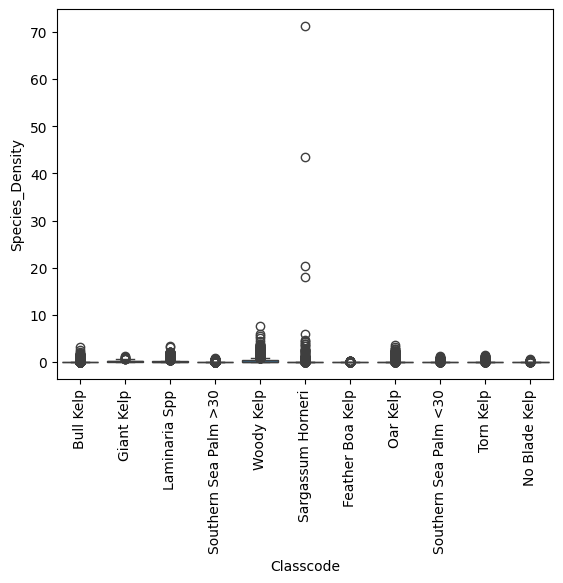

In [21]:
sns.boxplot(kelp_rcca_group, x='Classcode',y='Species_Density')
plt.xticks(rotation=90)
plt.show()

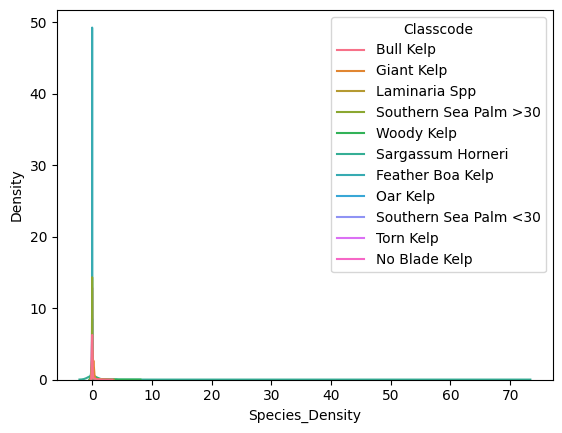

In [22]:
sns.kdeplot(kelp_rcca_group, x='Species_Density', hue='Classcode', common_norm = False)
plt.show()

## **Clearly, Sargassum is making this a little difficult (typical of invasive species)**

### **ANDDDD Zeros are skewwing it a lot**

1. In a new df, create a copy of kelp_rcca_ and remove all 0's in Total
2. Boxplot this, and plot just Bull Kelp, Woody Kelp, Laminaria Spp, and No Blade Kelp
3. KDE plot this, and plot just "...". Decide that you want to "zoom" in on the distrubition and use a violin plt. then look closer again? 
3. Decide that you want to facet by different y axes
    a. Create fig, ax for 2 by 2 plots
    b. one plot with automatic y, one plot for y goes 0-10, another for y goes 0-3, and last for just Bull Kelp, Woody Kelp, Laminaria Spp, and No Blade Kelp

In [23]:
#1
kelp_rcca_nonzero_df = kelp_rcca_group[kelp_rcca_group.Total!=0]

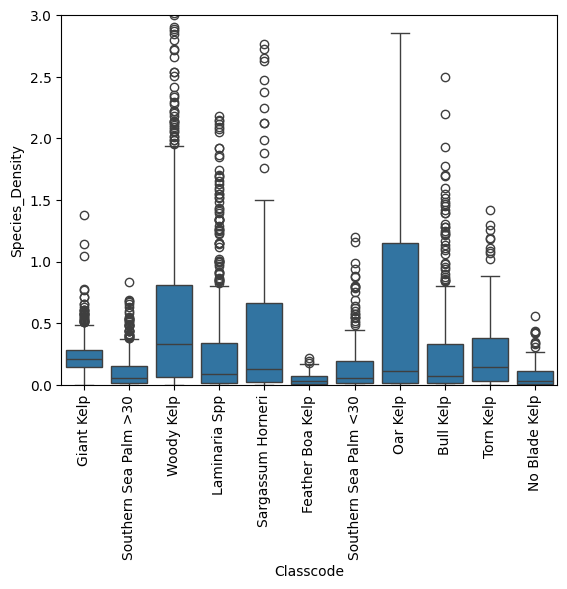

In [24]:
#2a
sns.boxplot(kelp_rcca_nonzero_df, x='Classcode',y='Species_Density')
plt.xticks(rotation=90)
plt.ylim(0,3)
plt.show()

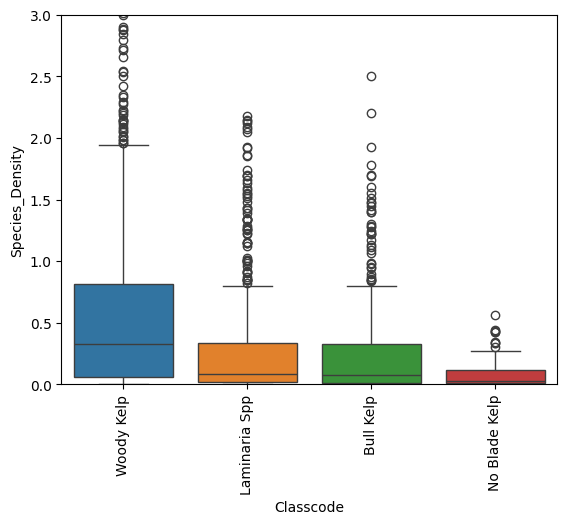

In [25]:
#2b
sns.boxplot(kelp_rcca_nonzero_df[kelp_rcca_nonzero_df.Classcode.str.contains(r'Bull|Laminaria|Woody|No Blade Kelp',regex=True)], x='Classcode',y='Species_Density', hue='Classcode')
plt.xticks(rotation=90)
plt.ylim(0,3)
plt.show()

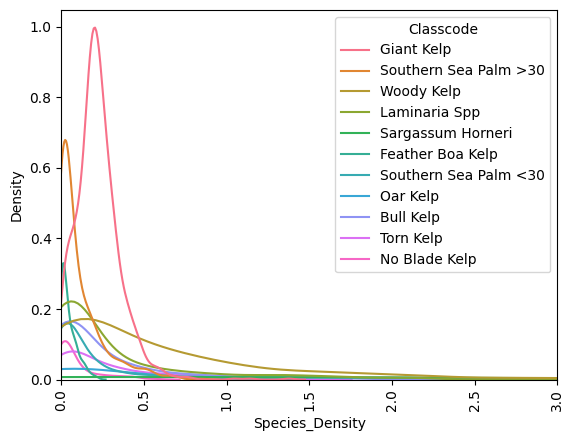

In [26]:
#3a - messy
sns.kdeplot(kelp_rcca_nonzero_df, hue='Classcode',x='Species_Density', fill=False)
plt.xticks(rotation=90)
plt.xlim(0,3)
plt.show()

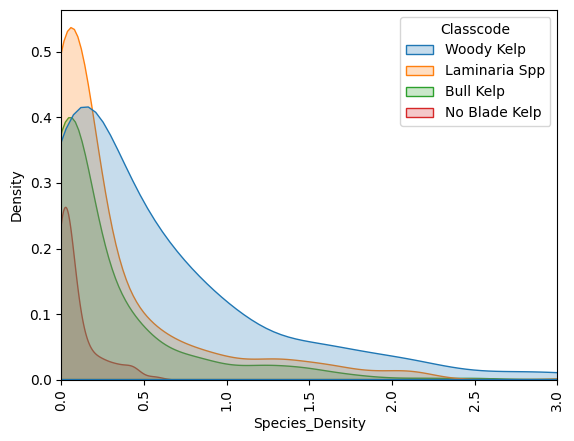

In [27]:
#3b
sns.kdeplot(kelp_rcca_nonzero_df[kelp_rcca_nonzero_df.Classcode.str.contains(r'Bull|Laminaria|Woody|No Blade Kelp',regex=True)], hue='Classcode',x='Species_Density', fill=True)
plt.xticks(rotation=90)
plt.xlim(0,3)
plt.show()

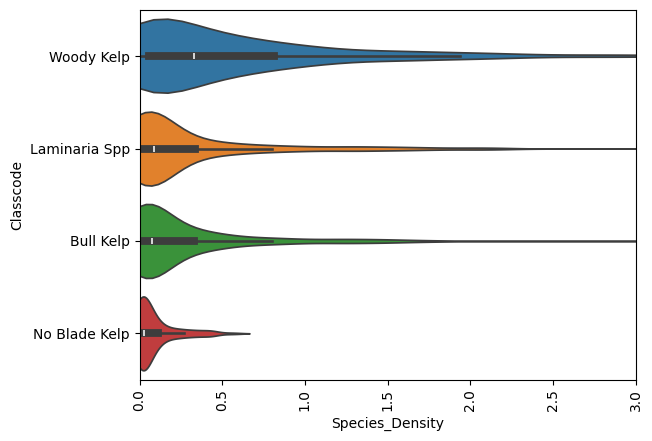

In [28]:
#3c
sns.violinplot(kelp_rcca_nonzero_df[kelp_rcca_nonzero_df.Classcode.str.contains(r'Bull|Laminaria|Woody|No Blade Kelp',regex=True)], hue='Classcode',x='Species_Density', y = 'Classcode', fill=True)
plt.xticks(rotation=90)
plt.xlim(0,3)
plt.show()

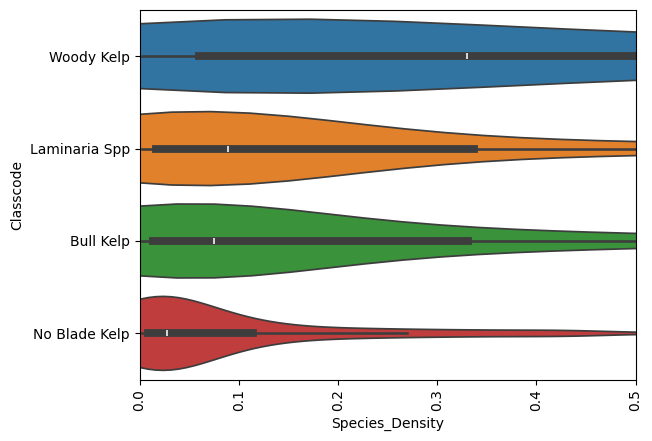

In [29]:
#3d
sns.violinplot(kelp_rcca_nonzero_df[kelp_rcca_nonzero_df.Classcode.str.contains(r'Bull|Laminaria|Woody|No Blade Kelp',regex=True)], hue='Classcode',x='Species_Density', y = 'Classcode', fill=True)
plt.xticks(rotation=90)
plt.xlim(0,0.5)
plt.show()

got the below idea for code from this source: https://github.com/mwaskom/seaborn/issues/2401#issuecomment-751357636

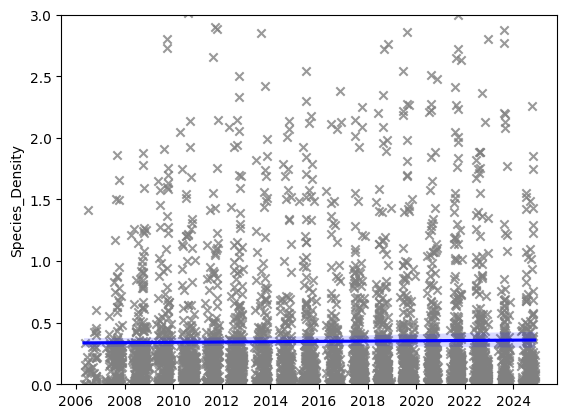

In [30]:

f, ax = plt.subplots()
ax.xaxis.update_units(kelp_rcca_nonzero_df.Date)
sns.regplot(kelp_rcca_nonzero_df,x=ax.xaxis.convert_units(kelp_rcca_nonzero_df.Date), y='Species_Density', color='0.5', marker='x',line_kws=dict(color="b"))
ax.set_ylim([0,3])


plt.show()

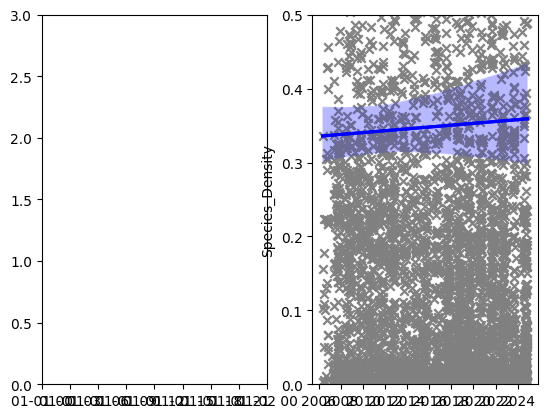

In [31]:
## did not work
f2, ax2 = plt.subplots(1,2)
ax2[0].xaxis.update_units(kelp_rcca_nonzero_df.Date)
sns.regplot(kelp_rcca_nonzero_df,x=ax2[0].xaxis.convert_units(kelp_rcca_nonzero_df.Date), y='Species_Density', color='0.5', marker='x',line_kws=dict(color="b"))
ax2[0].set_ylim([0,3])


ax2[1].xaxis.update_units(kelp_rcca_nonzero_df.Date)
sns.regplot(kelp_rcca_nonzero_df,x=ax2[1].xaxis.convert_units(kelp_rcca_nonzero_df.Date), y='Species_Density', color='0.5', marker='x',line_kws=dict(color="b"))
ax2[1].set_ylim([0,0.5])
plt.show()

plt.show()

Maybe problem with conversion of dates: 
other options:
- pd.Timestamp.toordinal()
    - converts it proleptic Gregorian ordinal: Jan 1 of Year 1 is Day 1
    - 
    
out of options

In [32]:
[i.toordinal() for i in kelp_rcca_nonzero_df.Date]

[732585,
 732907,
 732907,
 732907,
 733277,
 733565,
 733565,
 733565,
 733985,
 733985,
 733985,
 733985,
 734397,
 734397,
 734397,
 734397,
 734663,
 734663,
 734663,
 735034,
 735034,
 735034,
 735398,
 735398,
 735398,
 735831,
 735831,
 735831,
 736196,
 736196,
 736528,
 736528,
 736528,
 736885,
 737223,
 737223,
 737688,
 737688,
 737688,
 738094,
 738094,
 738094,
 738094,
 738364,
 739086,
 739086,
 739086,
 732948,
 733263,
 733263,
 733565,
 733565,
 733565,
 733963,
 733963,
 733963,
 734663,
 734663,
 734663,
 734663,
 735034,
 735034,
 735398,
 735398,
 735398,
 735398,
 735831,
 736249,
 736249,
 736528,
 736528,
 736528,
 737000,
 737000,
 737000,
 737000,
 737000,
 737688,
 737688,
 737688,
 736822,
 736822,
 737183,
 737183,
 737722,
 737722,
 735772,
 735772,
 735772,
 735772,
 736507,
 736507,
 736507,
 736864,
 736864,
 736864,
 736864,
 737228,
 737228,
 737228,
 737228,
 738026,
 738026,
 738026,
 738026,
 738328,
 738328,
 738328,
 738328,
 738328,
 738702,
 

In [33]:
kelp_rcca_nonzero_df['Dateordinal'] = [i.toordinal() for i in kelp_rcca_nonzero_df.Date]
kelp_rcca_nonzero_df.head(5)

Site   Latitude       Date  Year              Classcode  Amount  \
1   120 Reef  33.737919 2006-10-01  2006             Giant Kelp       9   
6   120 Reef  33.737919 2007-08-19  2007             Giant Kelp      34   
8   120 Reef  33.737919 2007-08-19  2007  Southern Sea Palm >30       1   
9   120 Reef  33.737919 2007-08-19  2007             Woody Kelp       3   
11  120 Reef  33.737919 2008-08-23  2008             Giant Kelp     326   

    Stipes  Total  Distance  Area_m2  Species_Density  Dateordinal  
1     63.0   63.0     360.0    720.0         0.087500       732585  
6    256.0  256.0     690.0   1380.0         0.185507       732907  
8      0.0    1.0     180.0    360.0         0.002778       732907  
9      0.0    3.0     180.0    360.0         0.008333       732907  
11   713.0  713.0    1094.0   2188.0         0.325868       733277

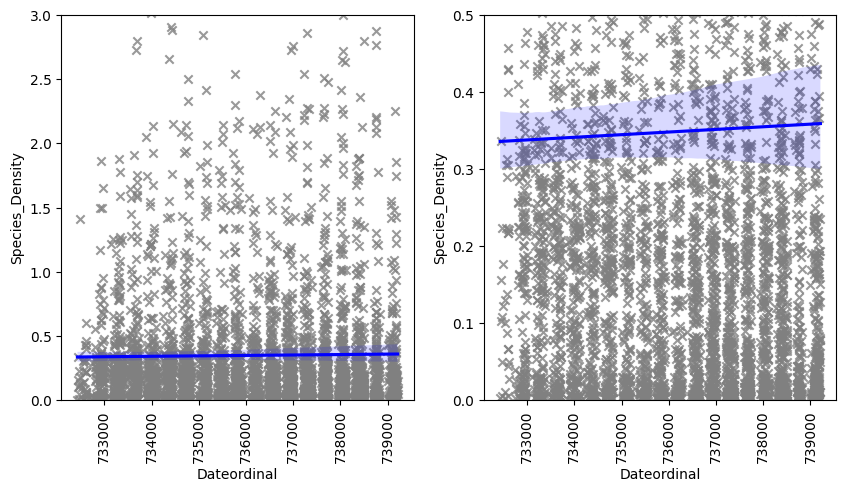

In [34]:
f2, ax2 = plt.subplots(1,2, figsize=(10,5))

sns.regplot(kelp_rcca_nonzero_df,x="Dateordinal", y='Species_Density', ax=ax2[0], color='0.5', marker='x',line_kws=dict(color="b"))
ax2[0].set_ylim([0,3])
ax2[0].tick_params(axis='x',labelrotation=90)

sns.regplot(kelp_rcca_nonzero_df,x='Dateordinal', y='Species_Density', ax=ax2[1], color='0.5', marker='x',line_kws=dict(color="b"))
ax2[1].set_ylim([0,0.5])
ax2[1].tick_params(axis='x',labelrotation=90)


plt.show()



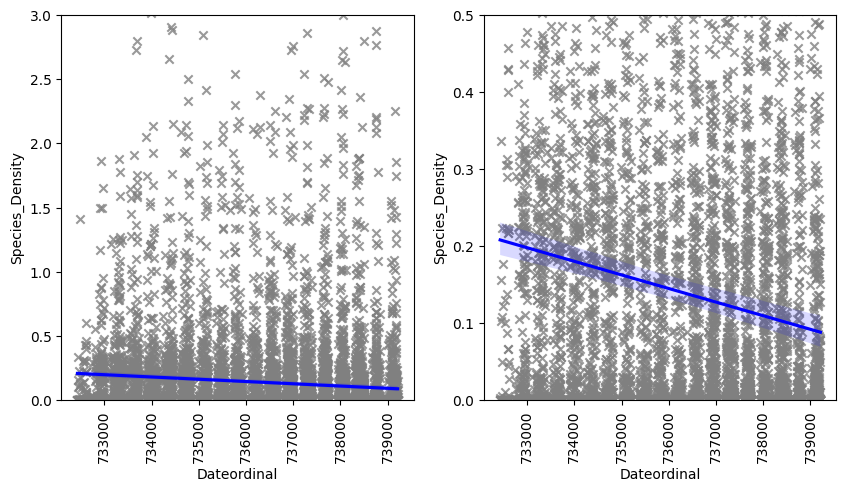

In [35]:
kelp_rcca_group['Dateordinal'] = [i.toordinal() for i in kelp_rcca_group.Date]

f1, ax1 = plt.subplots(1,2, figsize=(10,5))

sns.regplot(kelp_rcca_group,x="Dateordinal", y='Species_Density', ax=ax1[0], color='0.5', marker='x',line_kws=dict(color="b"))
ax1[0].set_ylim([0,3])
ax1[0].tick_params(axis='x',labelrotation=90)

sns.regplot(kelp_rcca_group,x='Dateordinal', y='Species_Density', ax=ax1[1], color='0.5', marker='x',line_kws=dict(color="b"))
ax1[1].set_ylim([0,0.5])
ax1[1].tick_params(axis='x',labelrotation=90)


plt.show()


## Great! We learned that dropped all zeros skews the data wayyy to much, and that overall, including all the zeros (including zeros at sites were the kelp was never present) across all of California for all kelp species, there is a negative trend



## The Plots from Here until I say stop are kind of useless (except in structure)
**What about just our species of realllll interest, bull kelp? No limit on the first y axis this time**

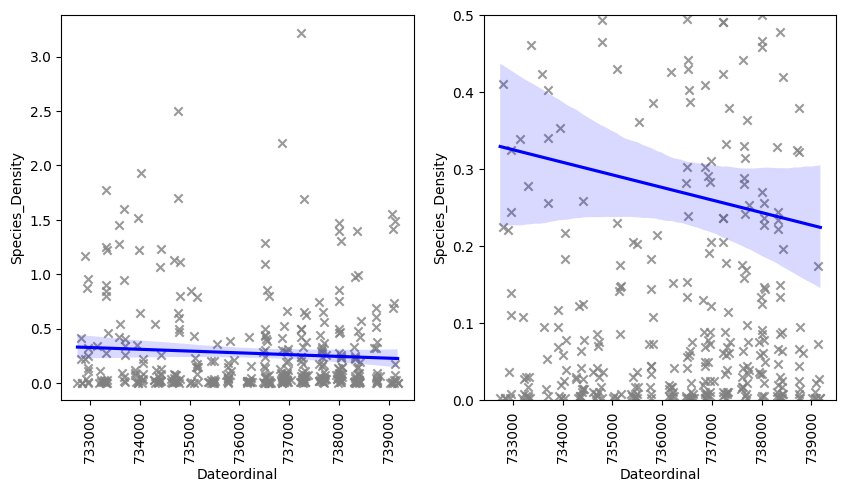

In [36]:
f3, ax3 = plt.subplots(1,2, figsize=(10,5))

sns.regplot(kelp_rcca_nonzero_df[kelp_rcca_nonzero_df.Classcode.str.contains('Bull')],x="Dateordinal", y='Species_Density', ax=ax3[0], color='0.5', marker='x',line_kws=dict(color="b"))

ax3[0].tick_params(axis='x',labelrotation=90)

sns.regplot(kelp_rcca_nonzero_df[kelp_rcca_nonzero_df.Classcode.str.contains('Bull')],x='Dateordinal', y='Species_Density', ax=ax3[1], color='0.5', marker='x',line_kws=dict(color="b"))
ax3[1].set_ylim([0,0.5])
ax3[1].tick_params(axis='x',labelrotation=90)


plt.show()


In [37]:
kelp_rcca_nonzero_df[(kelp_rcca_nonzero_df.Dateordinal>736400)&(kelp_rcca_nonzero_df.Dateordinal<737000)]

Site   Latitude       Date  Year              Classcode  \
58         120 Reef  33.737919 2017-07-18  2017             Giant Kelp   
60         120 Reef  33.737919 2017-07-18  2017      Sargassum Horneri   
62         120 Reef  33.737919 2017-07-18  2017             Woody Kelp   
65         120 Reef  33.737919 2018-07-10  2018             Giant Kelp   
167    Abalone Cove  33.736149 2017-07-18  2017             Giant Kelp   
...             ...        ...        ...   ...                    ...   
11258       Wipeout  32.821100 2018-09-29  2018             Giant Kelp   
11259       Wipeout  32.821100 2018-09-29  2018               Oar Kelp   
11261       Wipeout  32.821100 2018-09-29  2018  Southern Sea Palm <30   
11262       Wipeout  32.821100 2018-09-29  2018  Southern Sea Palm >30   
11264       Wipeout  32.821100 2018-09-29  2018             Woody Kelp   

       Amount  Stipes   Total  Distance  Area_m2  Species_Density  Dateordinal  
58        300   426.0   426.0    1008.2   2016.4         0.211268       736528  
60         23     0.0    23.0     180.0    360.0         0.063889       736528  
62          1     0.0     1.0     180.0    360.0         0.002778       736528  
65        263   876.0   876.0    2540.0   5080.0         0.172441       736885  
167       210   476.0   476.0    1254.0   2508.0         0.189793       736528  
...       ...     ...     ...       ...      ...              ...          ...  
11258      74  1316.0  1316.0    1830.0   3660.0         0.359563       736966  
11259     256     0.0   256.0     153.1    306.2         0.836055       736966  
11261     117     0.0   117.0     158.4    316.8         0.369318       736966  
11262      25     0.0    25.0     180.0    360.0         0.069444       736966  
11264      35     0.0    35.0     180.0    360.0         0.097222       736966  

[556 rows x 12 columns]

## STOP!

## Problem! We don't want to remove sites where there used to be kelp and then it dissapeared. Those are important zeros to include

### Need to filter out only rows of 0s where there are only rows of zero for that species at that site (no historical presence)

In [38]:
kelp_dict = kelp_rcca_group.groupby('Site')['Classcode'].unique().to_dict()

In [39]:
kelp_rcca_group['Classcode'].unique()

array(['Bull Kelp', 'Giant Kelp', 'Laminaria Spp',
       'Southern Sea Palm >30', 'Woody Kelp', 'Sargassum Horneri',
       'Feather Boa Kelp', 'Oar Kelp', 'Southern Sea Palm <30',
       'Torn Kelp', 'No Blade Kelp'], dtype=object)

In [40]:
kelp_rcca_group[kelp_rcca_group.Classcode.str.contains('Bull Kelp')]

Site   Latitude       Date  Year  Classcode  Amount  Stipes  \
0         120 Reef  33.737919 2006-10-01  2006  Bull Kelp       0     0.0   
5         120 Reef  33.737919 2007-08-19  2007  Bull Kelp       0     0.0   
10        120 Reef  33.737919 2008-08-23  2008  Bull Kelp       0     0.0   
15        120 Reef  33.737919 2009-06-07  2009  Bull Kelp       0     0.0   
20        120 Reef  33.737919 2010-08-01  2010  Bull Kelp       0     0.0   
...            ...        ...        ...   ...        ...     ...     ...   
11322  Yellowbanks  33.998798 2009-10-29  2009  Bull Kelp       0     0.0   
11327  Yellowbanks  33.998798 2010-11-17  2010  Bull Kelp       0     0.0   
11332  Yellowbanks  33.998798 2011-08-19  2011  Bull Kelp       0     0.0   
11337  Yellowbanks  33.998798 2012-07-24  2012  Bull Kelp       0     0.0   
11342  Yellowbanks  33.998798 2013-11-07  2013  Bull Kelp       0     0.0   

       Total  Distance  Area_m2  Species_Density  Dateordinal  
0        0.0     180.0    360.0              0.0       732585  
5        0.0     180.0    360.0              0.0       732907  
10       0.0     180.0    360.0              0.0       733277  
15       0.0     180.0    360.0              0.0       733565  
20       0.0     180.0    360.0              0.0       733985  
...      ...       ...      ...              ...          ...  
11322    0.0     180.0    360.0              0.0       733709  
11327    0.0     180.0    360.0              0.0       734093  
11332    0.0     180.0    360.0              0.0       734368  
11337    0.0     180.0    360.0              0.0       734708  
11342    0.0     180.0    360.0              0.0       735179  

[1588 rows x 12 columns]

In [41]:
kelp_rcca_group.iloc[0,:]['Total']

np.float64(0.0)

In [42]:
kelp_rcca_group.Classcode.unique()

array(['Bull Kelp', 'Giant Kelp', 'Laminaria Spp',
       'Southern Sea Palm >30', 'Woody Kelp', 'Sargassum Horneri',
       'Feather Boa Kelp', 'Oar Kelp', 'Southern Sea Palm <30',
       'Torn Kelp', 'No Blade Kelp'], dtype=object)

In [43]:
kelp_rcca_group

def drophistoricalnull(dataframe, column_category_1, column_category_2, column_zeros):
    
    cat_dict = dataframe.groupby(column_category_1)[column_category_2].unique().to_dict()
    
    for cat1,classcodes in cat_dict.items():
        for cat2 in classcodes:
            cat_df = dataframe[(dataframe[column_category_1]==cat1)&(dataframe[column_category_2]==cat2)]
            if cat_df[column_zeros].sum() == 0.0:
                dataframe = dataframe.drop(cat_df.index, axis=0)
    return dataframe
    
kelp_rcca_nohistzero_df = drophistoricalnull(kelp_rcca_group, 'Site', 'Classcode','Total')             

In [44]:
print(kelp_rcca_nohistzero_df.shape)
kelp_rcca_nohistzero_df.head(3)

(6866, 12)


Site   Latitude       Date  Year              Classcode  Amount  \
1  120 Reef  33.737919 2006-10-01  2006             Giant Kelp       9   
2  120 Reef  33.737919 2006-10-01  2006          Laminaria Spp       0   
3  120 Reef  33.737919 2006-10-01  2006  Southern Sea Palm >30       0   

   Stipes  Total  Distance  Area_m2  Species_Density  Dateordinal  
1    63.0   63.0     360.0    720.0           0.0875       732585  
2     0.0    0.0     180.0    360.0           0.0000       732585  
3     0.0    0.0     180.0    360.0           0.0000       732585

In [45]:
print(kelp_rcca_group.shape)
kelp_rcca_group.head(3)

(11347, 12)


Site   Latitude       Date  Year      Classcode  Amount  Stipes  Total  \
0  120 Reef  33.737919 2006-10-01  2006      Bull Kelp       0     0.0    0.0   
1  120 Reef  33.737919 2006-10-01  2006     Giant Kelp       9    63.0   63.0   
2  120 Reef  33.737919 2006-10-01  2006  Laminaria Spp       0     0.0    0.0   

   Distance  Area_m2  Species_Density  Dateordinal  
0     180.0    360.0           0.0000       732585  
1     360.0    720.0           0.0875       732585  
2     180.0    360.0           0.0000       732585

## Great! We kept at the zeros were at some point in time the species was present for each species for each site.

## This reduced the dataframe into about 4,500 less rows! Should change up the data quite a bit

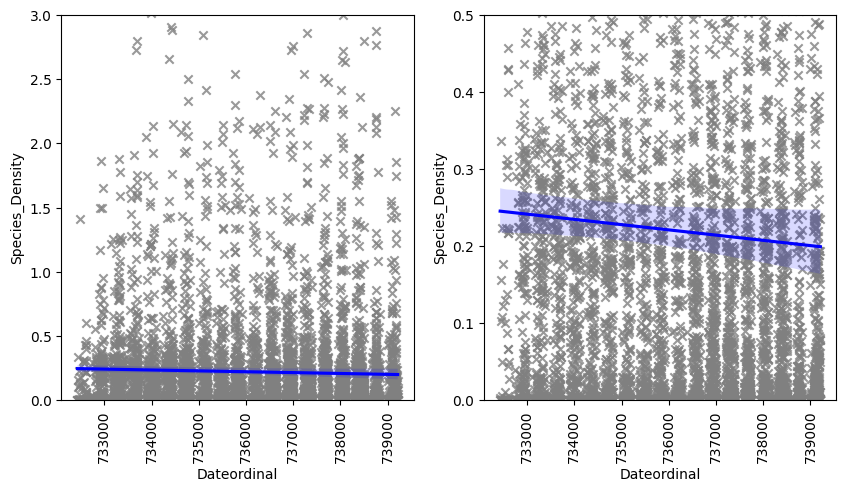

In [46]:
kelp_rcca_nohistzero_df['Dateordinal'] = [i.toordinal() for i in kelp_rcca_nohistzero_df.Date]

f4, ax4 = plt.subplots(1,2, figsize=(10,5))

sns.regplot(kelp_rcca_nohistzero_df,x="Dateordinal", y='Species_Density', ax=ax4[0], color='0.5', marker='x',line_kws=dict(color="b"))
ax4[0].set_ylim([0,3])
ax4[0].tick_params(axis='x',labelrotation=90)

sns.regplot(kelp_rcca_nohistzero_df,x='Dateordinal', y='Species_Density', ax=ax4[1], color='0.5', marker='x',line_kws=dict(color="b"))
ax4[1].set_ylim([0,0.5])
ax4[1].tick_params(axis='x',labelrotation=90)


plt.show()


**That made quite a difference!**

This change was made somewhat late in the game. So! We are going to reassign kelp_rcca_nohistzero_df to kelp_rcca_group so we can just plug and chug.

In [47]:
kelp_rcca_group[kelp_rcca_group.Date == '2018-09-16'].tail(3)

Site  Latitude       Date  Year              Classcode  Amount  \
10378  Timber Cove  38.53057 2018-09-16  2018  Southern Sea Palm >30       0   
10379  Timber Cove  38.53057 2018-09-16  2018              Torn Kelp       0   
10380  Timber Cove  38.53057 2018-09-16  2018             Woody Kelp       0   

       Stipes  Total  Distance  Area_m2  Species_Density  Dateordinal  
10378     0.0    0.0     180.0    360.0              0.0       736953  
10379     0.0    0.0     180.0    360.0              0.0       736953  
10380     0.0    0.0     180.0    360.0              0.0       736953

In [48]:
kelp_rcca_group = kelp_rcca_nohistzero_df

In [49]:
kelp_rcca_group[kelp_rcca_group.Date == '2018-09-16'].tail(3)

Site  Latitude       Date  Year              Classcode  \
10157  Stillwater Monterey   36.5602 2018-09-16  2018  Southern Sea Palm >30   
10158  Stillwater Monterey   36.5602 2018-09-16  2018              Torn Kelp   
10159  Stillwater Monterey   36.5602 2018-09-16  2018             Woody Kelp   

       Amount  Stipes  Total  Distance  Area_m2  Species_Density  Dateordinal  
10157       0     0.0    0.0     180.0    360.0         0.000000       736953  
10158       0     0.0    0.0     180.0    360.0         0.000000       736953  
10159     113     0.0  113.0     171.0    342.0         0.330409       736953

In [50]:
kelp_rcca_group

Site   Latitude       Date  Year              Classcode  Amount  \
1         120 Reef  33.737919 2006-10-01  2006             Giant Kelp       9   
2         120 Reef  33.737919 2006-10-01  2006          Laminaria Spp       0   
3         120 Reef  33.737919 2006-10-01  2006  Southern Sea Palm >30       0   
4         120 Reef  33.737919 2006-10-01  2006             Woody Kelp       0   
6         120 Reef  33.737919 2007-08-19  2007             Giant Kelp      34   
...            ...        ...        ...   ...                    ...     ...   
11341  Yellowbanks  33.998798 2012-07-24  2012             Woody Kelp     195   
11343  Yellowbanks  33.998798 2013-11-07  2013             Giant Kelp      96   
11344  Yellowbanks  33.998798 2013-11-07  2013          Laminaria Spp     183   
11345  Yellowbanks  33.998798 2013-11-07  2013  Southern Sea Palm >30      17   
11346  Yellowbanks  33.998798 2013-11-07  2013             Woody Kelp     260   

       Stipes  Total  Distance  Area_m2  Species_Density  Dateordinal  
1        63.0   63.0     360.0    720.0         0.087500       732585  
2         0.0    0.0     180.0    360.0         0.000000       732585  
3         0.0    0.0     180.0    360.0         0.000000       732585  
4         0.0    0.0     180.0    360.0         0.000000       732585  
6       256.0  256.0     690.0   1380.0         0.185507       732907  
...       ...    ...       ...      ...              ...          ...  
11341     0.0  195.0     178.0    356.0         0.547753       734708  
11343   574.0  574.0    1620.0   3240.0         0.177160       735179  
11344     0.0  183.0     180.0    360.0         0.508333       735179  
11345     0.0   17.0     180.0    360.0         0.047222       735179  
11346     0.0  260.0     166.0    332.0         0.783133       735179  

[6866 rows x 12 columns]

**Lets just focus on the sites we care about. Filter by latitude again**

In [51]:
ftbrgg_kelpdensity = kelp_rcca_group[(kelp_rcca_group.Latitude>=39)&(kelp_rcca_group.Latitude<=40)]
ftbrgg_kelpdensity.head()

Site  Latitude       Date  Year   Classcode  Amount  Stipes  \
190  Albion Cove  39.22778 2018-05-08  2018   Bull Kelp      47     0.0   
197  Albion Cove  39.22778 2018-05-08  2018   Torn Kelp       0     0.0   
198  Albion Cove  39.22778 2018-05-08  2018  Woody Kelp     253     0.0   
199  Albion Cove  39.22778 2019-05-04  2019   Bull Kelp       0     0.0   
206  Albion Cove  39.22778 2019-05-04  2019   Torn Kelp      94     0.0   

     Total  Distance  Area_m2  Species_Density  Dateordinal  
190   47.0     180.0    360.0         0.130556       736822  
197    0.0     180.0    360.0         0.000000       736822  
198  253.0     156.1    312.2         0.810378       736822  
199    0.0     180.0    360.0         0.000000       737183  
206   94.0     168.0    336.0         0.279762       737183

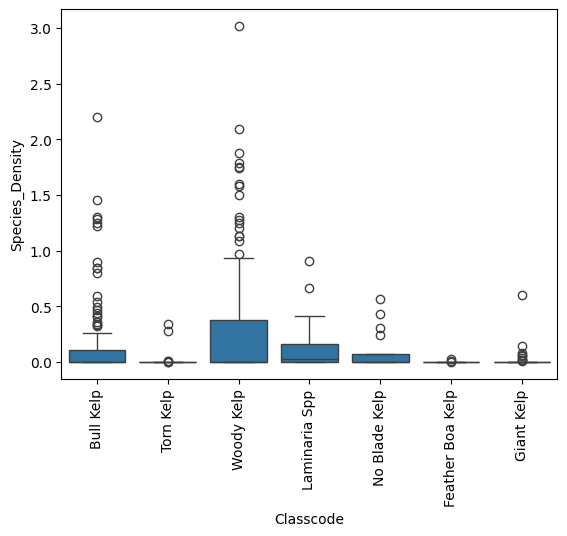

In [52]:
sns.boxplot(ftbrgg_kelpdensity, x='Classcode',y='Species_Density')
plt.xticks(rotation=90)
plt.show()

**facet by site**

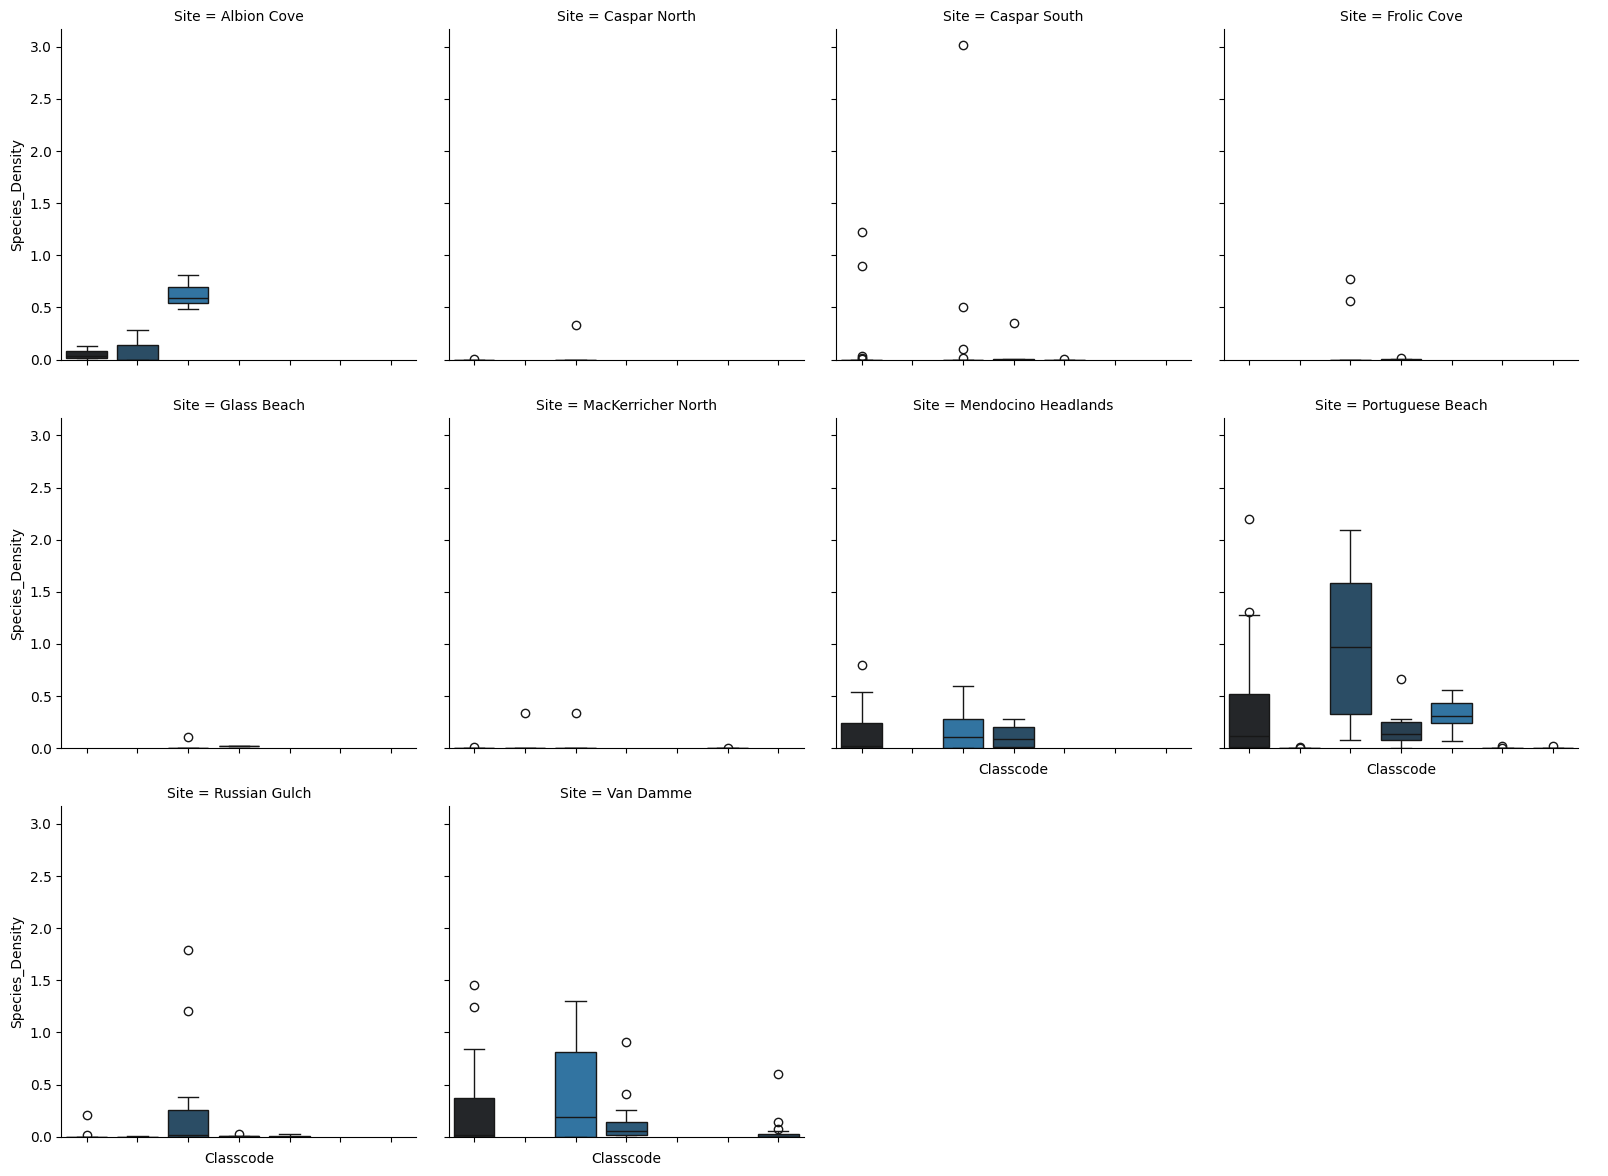

In [53]:
facet = sns.FacetGrid(ftbrgg_kelpdensity, col = 'Site', col_wrap=4, height=4)
facet.map_dataframe(sns.boxplot, x = 'Classcode', y='Species_Density', hue='Classcode')
facet.set_xticklabels(rotation=90)
facet.add_legend()
facet.set(ylim=(0,None))
plt.show()

**Scatter plot**

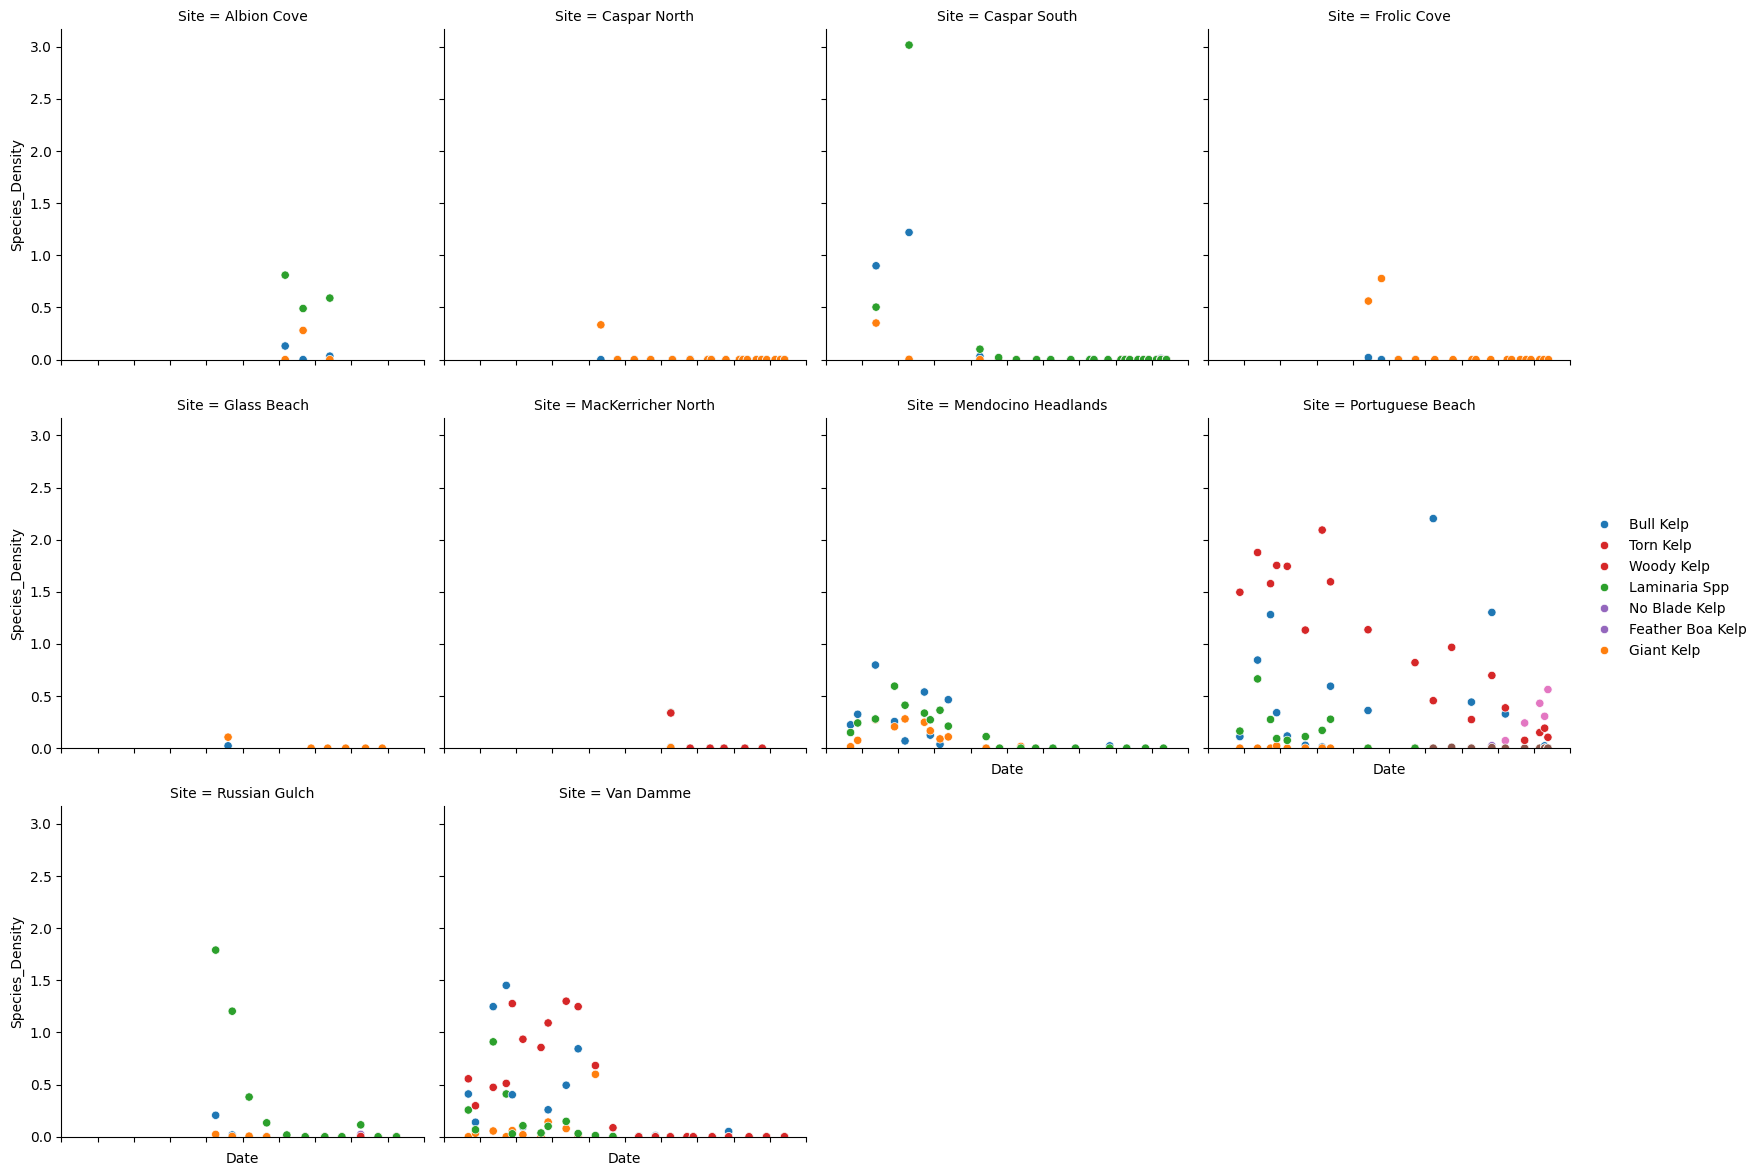

In [54]:
facet = sns.FacetGrid(ftbrgg_kelpdensity, col = 'Site', col_wrap=4, height=4)
facet.map_dataframe(sns.scatterplot, x = 'Date', y='Species_Density', hue='Classcode')
facet.set_xticklabels(rotation=90)
facet.add_legend()
facet.set(ylim=(0,None))
plt.show()

**Upon visual inspection, it looks like Caspar Beaches have the most in common with Frolic Cove (shares similar species and range of density), followed by Mendocino Headlands, and then Van Damme.**



## Checkpoint : Diversity

**Similar to invert data in Analysis 1:

## Gini-Simpson's Biodiversity Index
D = 1 - (sum(n(n-1)) / (N(n-1)))


where n = number of individuals of a specific species and N represents the total number of species in the sample. 
 
1. For each Site and Date, need to get a total number of individuals at the site per day. Assign this to "N_site"
2. Calculate the "(sum(n(n-1)) / (N(n-1)))" portion for each species and assign it to "kelp_n_N". Append this as a new column of the same name to theseries_df
3. Group by Site, Date, Year, and Latitude, while Summing n_n1_N_N1. Subtract this from one. Reset the index and assing this to a new dataframe "simpsons_biodiv". Rename the columns to reflect the new values. This is the Simpson Biodiversity Index of that site at that moment in time
4. Plot!

In [55]:
N_site = kelp_rcca_group.groupby(['Site','Date'])['Total'].sum().reset_index()
N_site.rename(columns={'Total':'Total_Count_Site'}, inplace=True)
N_site



Site       Date  Total_Count_Site
0        120 Reef 2006-10-01              63.0
1        120 Reef 2007-08-19             260.0
2        120 Reef 2008-08-23             713.0
3        120 Reef 2009-06-07            1070.0
4        120 Reef 2010-08-01             651.0
...           ...        ...               ...
1582  Yellowbanks 2009-10-29             614.0
1583  Yellowbanks 2010-11-17            1150.0
1584  Yellowbanks 2011-08-19             908.0
1585  Yellowbanks 2012-07-24            1263.0
1586  Yellowbanks 2013-11-07            1034.0

[1587 rows x 3 columns]

**Want to append these values onto the kelp_rcca_group dataframe**

In [56]:
kelp_rcca_group = pd.merge(kelp_rcca_group, N_site[['Site','Date','Total_Count_Site']], on=['Site','Date'], how ='left')
kelp_rcca_group.isna().sum()

Site                0
Latitude            0
Date                0
Year                0
Classcode           0
Amount              0
Stipes              0
Total               0
Distance            0
Area_m2             0
Species_Density     0
Dateordinal         0
Total_Count_Site    0
dtype: int64

In [57]:
kelp_rcca_group['n_n1'] = kelp_rcca_group.Total*(kelp_rcca_group.Total -1)
kelp_rcca_biodiv = kelp_rcca_group.groupby(['Site','Latitude','Date','Year','Total_Count_Site'])['n_n1'].sum().reset_index()
kelp_rcca_biodiv['Simpsons'] = 1 - (kelp_rcca_biodiv['n_n1']/(kelp_rcca_biodiv.Total_Count_Site * (kelp_rcca_biodiv.Total_Count_Site - 1)))
kelp_rcca_biodiv.drop(axis=1,labels='n_n1',inplace=True)
kelp_rcca_biodiv = kelp_rcca_biodiv.fillna(value={'Simpsons':0.0})
kelp_rcca_biodiv

Site   Latitude       Date  Year  Total_Count_Site  Simpsons
0        120 Reef  33.737919 2006-10-01  2006              63.0  0.000000
1        120 Reef  33.737919 2007-08-19  2007             260.0  0.030502
2        120 Reef  33.737919 2008-08-23  2008             713.0  0.000000
3        120 Reef  33.737919 2009-06-07  2009            1070.0  0.020410
4        120 Reef  33.737919 2010-08-01  2010             651.0  0.364641
...           ...        ...        ...   ...               ...       ...
1582  Yellowbanks  33.998798 2009-10-29  2009             614.0  0.521603
1583  Yellowbanks  33.998798 2010-11-17  2010            1150.0  0.332471
1584  Yellowbanks  33.998798 2011-08-19  2011             908.0  0.525786
1585  Yellowbanks  33.998798 2012-07-24  2012            1263.0  0.365035
1586  Yellowbanks  33.998798 2013-11-07  2013            1034.0  0.597593

[1587 rows x 6 columns]

In [58]:
kelp_rcca_biodiv[kelp_rcca_biodiv.Simpsons.isna()]

Empty DataFrame
Columns: [Site, Latitude, Date, Year, Total_Count_Site, Simpsons]
Index: []

In [59]:

kelp_rcca_biodiv[kelp_rcca_biodiv.Site.str.contains('Van')].head()

Site   Latitude       Date  Year  Total_Count_Site  Simpsons
1488  Van Damme  39.271915 2007-05-15  2007             422.0  0.628395
1489  Van Damme  39.271915 2007-10-06  2007             193.0  0.609348
1490  Van Damme  39.271915 2008-09-27  2008             663.0  0.684579
1491  Van Damme  39.271915 2009-06-17  2009             601.0  0.622934
1492  Van Damme  39.271915 2009-10-17  2009             487.0  0.558268

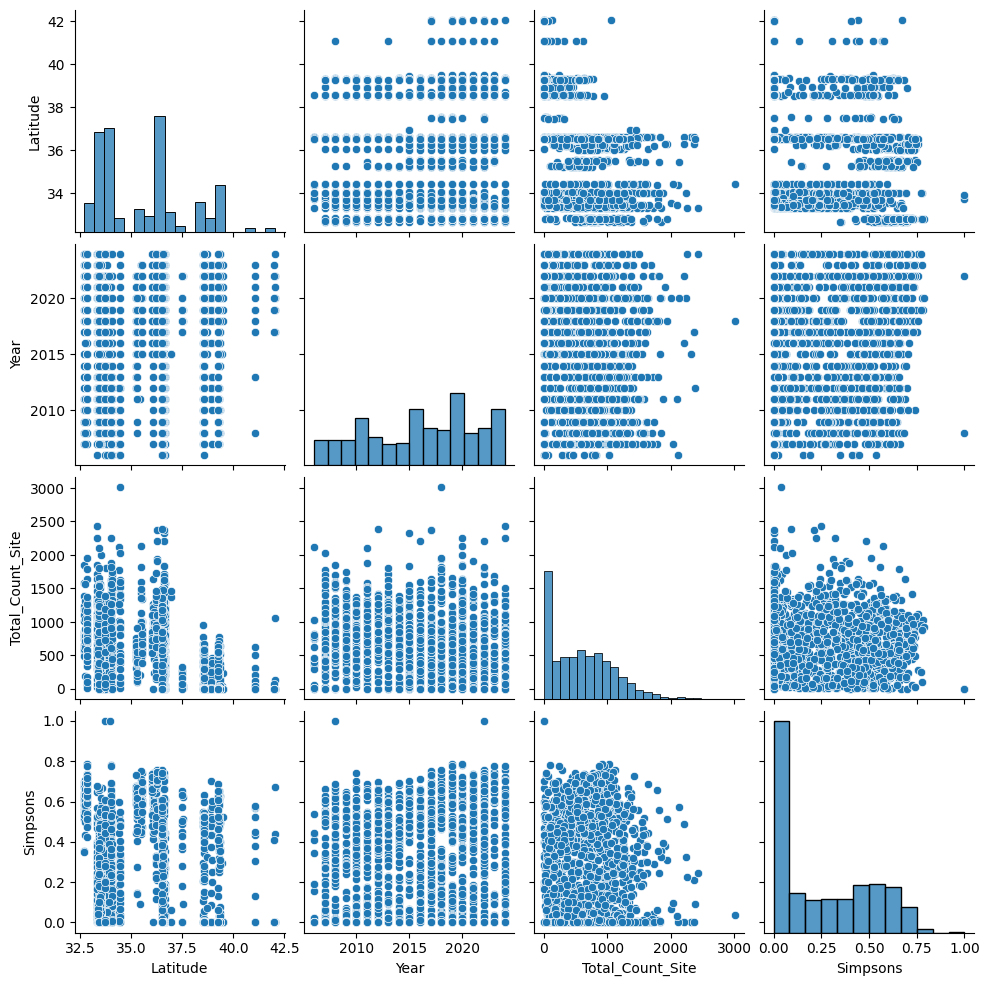

In [60]:
sns.pairplot(kelp_rcca_biodiv)
plt.show()

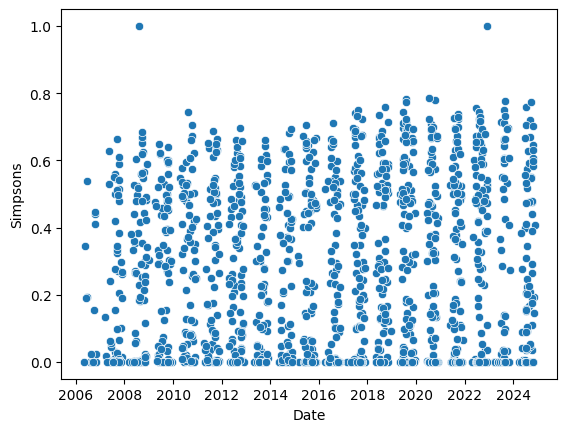

In [61]:
sns.scatterplot(kelp_rcca_biodiv, x='Date', y='Simpsons')
plt.show()

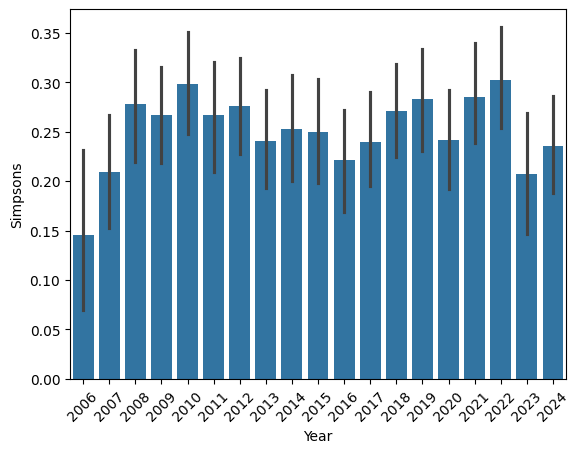

In [62]:
sns.barplot(kelp_rcca_biodiv, x='Year', y='Simpsons')
plt.xticks(rotation=45)
plt.show()

**Now we can see trends in biodiveristy of sites!**

**Onto the next diversity marker**

# Shannon - Weiner's Diversity

- said to be more informative
- takes relative abundance into account

$$
H' = -\sum_{i=1}^{S} p_i \ln p_i
$$

- H is diversity index
- p_i is the proportion of individuals of species i
    - p_i is the number of species i divided by the total number of all individuals of all species in a sample. 
- S is the total number of species
- p_i * ln(p_i) is summed for each species for a site and multiplied by -1

In [63]:
kelp_rcca_group.head(3)

Site   Latitude       Date  Year              Classcode  Amount  \
0  120 Reef  33.737919 2006-10-01  2006             Giant Kelp       9   
1  120 Reef  33.737919 2006-10-01  2006          Laminaria Spp       0   
2  120 Reef  33.737919 2006-10-01  2006  Southern Sea Palm >30       0   

   Stipes  Total  Distance  Area_m2  Species_Density  Dateordinal  \
0    63.0   63.0     360.0    720.0           0.0875       732585   
1     0.0    0.0     180.0    360.0           0.0000       732585   
2     0.0    0.0     180.0    360.0           0.0000       732585   

   Total_Count_Site    n_n1  
0              63.0  3906.0  
1              63.0    -0.0  
2              63.0    -0.0

- can use Total and Total_Count_Site to caculate the first portion

In [64]:
import math
np.log(1)


np.float64(0.0)

In [65]:
prop = kelp_rcca_group.Total / kelp_rcca_group.Total_Count_Site
pi_lnpi = prop * np.log(prop)
kelp_rcca_group['pi_lnpi']= pi_lnpi


In [66]:
shannon_kelp = (kelp_rcca_group.groupby(['Site','Latitude','Date','Year'])[['pi_lnpi']].sum()).reset_index()
shannon_kelp['shannon_div']= -1.0*shannon_kelp['pi_lnpi']
shannon_kelp.drop(columns=['pi_lnpi'], inplace=True)
shannon_kelp.replace(-0.0000, 0.0000, inplace=True)

In [67]:
shannon_kelp

Site   Latitude       Date  Year  shannon_div
0        120 Reef  33.737919 2006-10-01  2006     0.000000
1        120 Reef  33.737919 2007-08-19  2007     0.088138
2        120 Reef  33.737919 2008-08-23  2008     0.000000
3        120 Reef  33.737919 2009-06-07  2009     0.063310
4        120 Reef  33.737919 2010-08-01  2010     0.639033
...           ...        ...        ...   ...          ...
1582  Yellowbanks  33.998798 2009-10-29  2009     0.834675
1583  Yellowbanks  33.998798 2010-11-17  2010     0.588510
1584  Yellowbanks  33.998798 2011-08-19  2011     0.873590
1585  Yellowbanks  33.998798 2012-07-24  2012     0.663190
1586  Yellowbanks  33.998798 2013-11-07  2013     1.047876

[1587 rows x 5 columns]

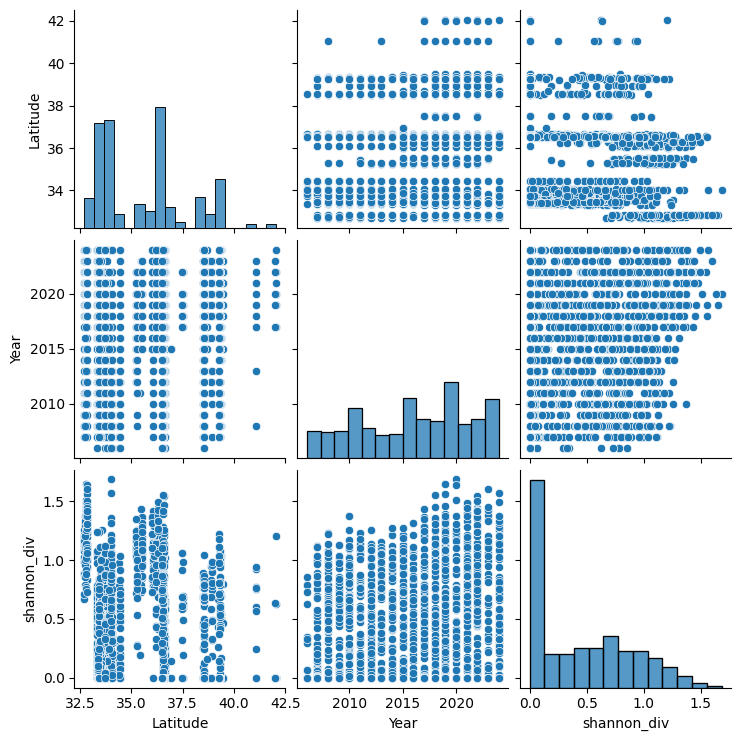

In [68]:
sns.pairplot(data=shannon_kelp)

- Shannons diversity decreases with increasing latitude
- Shannons diveristy for CA has overall increasing trend,  with dip seen around 2015 ish and 2020

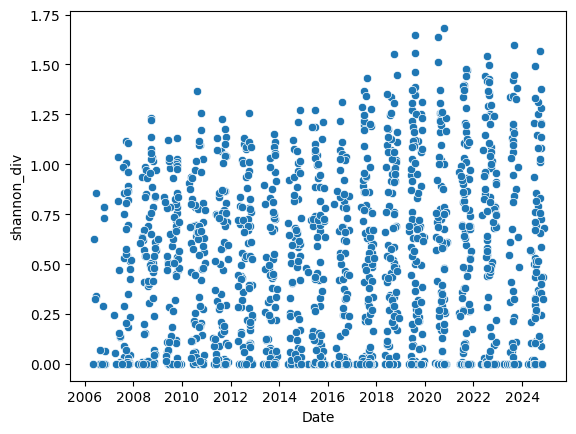

In [69]:
sns.scatterplot(data=shannon_kelp,x='Date',y='shannon_div')
plt.show()

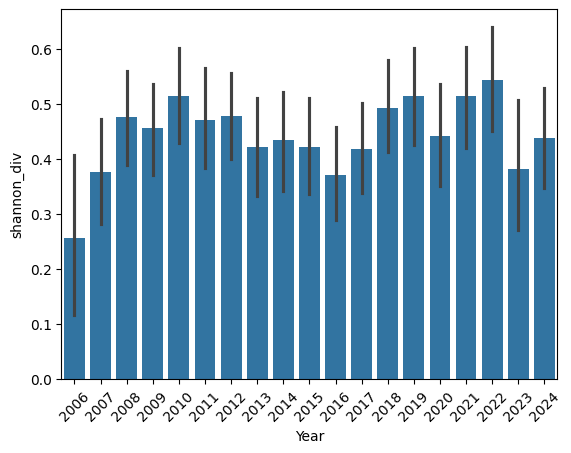

In [70]:
sns.barplot(shannon_kelp,x='Year',y='shannon_div')
plt.xticks(rotation=45)
plt.show()

- How do the two indices compare? Want to get into same dataframe, and add our last ecological parameter, richness, to the dataset. 

In [71]:
eco_kelp = kelp_rcca_biodiv.merge(right=shannon_kelp, on=['Site','Latitude','Date','Year'])
eco_kelp


Site   Latitude       Date  Year  Total_Count_Site  Simpsons  \
0        120 Reef  33.737919 2006-10-01  2006              63.0  0.000000   
1        120 Reef  33.737919 2007-08-19  2007             260.0  0.030502   
2        120 Reef  33.737919 2008-08-23  2008             713.0  0.000000   
3        120 Reef  33.737919 2009-06-07  2009            1070.0  0.020410   
4        120 Reef  33.737919 2010-08-01  2010             651.0  0.364641   
...           ...        ...        ...   ...               ...       ...   
1582  Yellowbanks  33.998798 2009-10-29  2009             614.0  0.521603   
1583  Yellowbanks  33.998798 2010-11-17  2010            1150.0  0.332471   
1584  Yellowbanks  33.998798 2011-08-19  2011             908.0  0.525786   
1585  Yellowbanks  33.998798 2012-07-24  2012            1263.0  0.365035   
1586  Yellowbanks  33.998798 2013-11-07  2013            1034.0  0.597593   

      shannon_div  
0        0.000000  
1        0.088138  
2        0.000000  
3        0.063310  
4        0.639033  
...           ...  
1582     0.834675  
1583     0.588510  
1584     0.873590  
1585     0.663190  
1586     1.047876  

[1587 rows x 7 columns]

In [72]:
kelp_rcca_biodiv[kelp_rcca_biodiv.Date == '2018-09-16']

Site  Latitude       Date  Year  Total_Count_Site  \
1418  Stillwater Monterey   36.5602 2018-09-16  2018             263.0   

      Simpsons  
1418  0.491975

In [73]:
eco_kelp[eco_kelp.Date == '2018-09-16']

Site  Latitude       Date  Year  Total_Count_Site  \
1418  Stillwater Monterey   36.5602 2018-09-16  2018             263.0   

      Simpsons  shannon_div  
1418  0.491975     0.683218

In [74]:
kelp_rcca_group
species_presence = []
for i in kelp_rcca_group.Total:
    if i >0:
        species_presence.append(True)
    elif i == 0:
        species_presence.append(False)
    else:
        species_presence.append(False)
species_presence   

[True,
 False,
 False,
 False,
 True,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 True,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 Tru

In [75]:
kelp_rcca_group['species_presence'] = species_presence
kelp_rcca_group
species_count = kelp_rcca_group.groupby(['Site','Latitude','Date','Year'])['species_presence'].sum().reset_index()

species_count

Site   Latitude       Date  Year  species_presence
0        120 Reef  33.737919 2006-10-01  2006                 1
1        120 Reef  33.737919 2007-08-19  2007                 3
2        120 Reef  33.737919 2008-08-23  2008                 1
3        120 Reef  33.737919 2009-06-07  2009                 3
4        120 Reef  33.737919 2010-08-01  2010                 4
...           ...        ...        ...   ...               ...
1582  Yellowbanks  33.998798 2009-10-29  2009                 3
1583  Yellowbanks  33.998798 2010-11-17  2010                 4
1584  Yellowbanks  33.998798 2011-08-19  2011                 3
1585  Yellowbanks  33.998798 2012-07-24  2012                 3
1586  Yellowbanks  33.998798 2013-11-07  2013                 4

[1587 rows x 5 columns]

In [76]:
eco_kelp = eco_kelp.merge(right=species_count, on=['Site','Latitude','Date','Year'])
eco_kelp.rename(columns={'species_presence':'Richness',
                        'shannon_div':'Shannon'}, inplace=True)
eco_kelp

Site   Latitude       Date  Year  Total_Count_Site  Simpsons  \
0        120 Reef  33.737919 2006-10-01  2006              63.0  0.000000   
1        120 Reef  33.737919 2007-08-19  2007             260.0  0.030502   
2        120 Reef  33.737919 2008-08-23  2008             713.0  0.000000   
3        120 Reef  33.737919 2009-06-07  2009            1070.0  0.020410   
4        120 Reef  33.737919 2010-08-01  2010             651.0  0.364641   
...           ...        ...        ...   ...               ...       ...   
1582  Yellowbanks  33.998798 2009-10-29  2009             614.0  0.521603   
1583  Yellowbanks  33.998798 2010-11-17  2010            1150.0  0.332471   
1584  Yellowbanks  33.998798 2011-08-19  2011             908.0  0.525786   
1585  Yellowbanks  33.998798 2012-07-24  2012            1263.0  0.365035   
1586  Yellowbanks  33.998798 2013-11-07  2013            1034.0  0.597593   

       Shannon  Richness  
0     0.000000         1  
1     0.088138         3  
2     0.000000         1  
3     0.063310         3  
4     0.639033         4  
...        ...       ...  
1582  0.834675         3  
1583  0.588510         4  
1584  0.873590         3  
1585  0.663190         3  
1586  1.047876         4  

[1587 rows x 8 columns]

# Get into long format - melt

In [77]:
melted_kelp = eco_kelp.melt(id_vars= ['Site','Latitude','Date','Year'],
             value_vars=['Simpsons','Shannon', 'Richness'],
             var_name='Ecological_Parameter',
              value_name='Value')
melted_kelp 
        

Site   Latitude       Date  Year Ecological_Parameter     Value
0        120 Reef  33.737919 2006-10-01  2006             Simpsons  0.000000
1        120 Reef  33.737919 2007-08-19  2007             Simpsons  0.030502
2        120 Reef  33.737919 2008-08-23  2008             Simpsons  0.000000
3        120 Reef  33.737919 2009-06-07  2009             Simpsons  0.020410
4        120 Reef  33.737919 2010-08-01  2010             Simpsons  0.364641
...           ...        ...        ...   ...                  ...       ...
4756  Yellowbanks  33.998798 2009-10-29  2009             Richness  3.000000
4757  Yellowbanks  33.998798 2010-11-17  2010             Richness  4.000000
4758  Yellowbanks  33.998798 2011-08-19  2011             Richness  3.000000
4759  Yellowbanks  33.998798 2012-07-24  2012             Richness  3.000000
4760  Yellowbanks  33.998798 2013-11-07  2013             Richness  4.000000

[4761 rows x 6 columns]

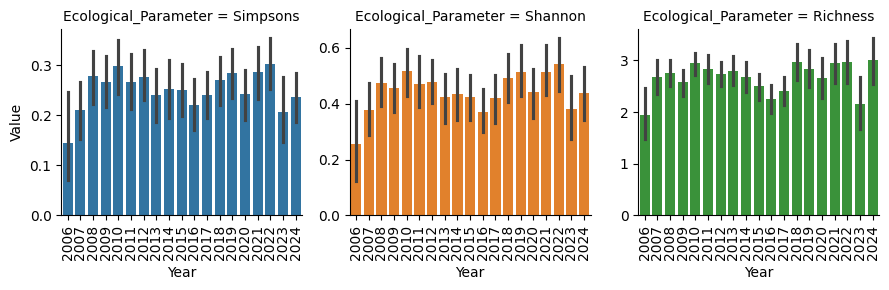

In [78]:
g = sns.FacetGrid(melted_kelp, col='Ecological_Parameter',hue='Ecological_Parameter', sharey=False)
g.map_dataframe(sns.barplot, x='Year',y='Value')

g.set_xticklabels(rotation=90)
plt.tight_layout()

plt.show()

# Sites of Interest!

**Should filter back down to fort bragg area**

In [79]:
ftbrgg_kelp_biodiv = kelp_rcca_biodiv[(kelp_rcca_biodiv.Latitude>=39)&(kelp_rcca_biodiv.Latitude<=40)]
ftbrgg_kelp_biodiv 

Site   Latitude       Date  Year  Total_Count_Site  Simpsons
30     Albion Cove  39.227780 2018-05-08  2018             300.0  0.265128
31     Albion Cove  39.227780 2019-05-04  2019             243.0  0.476346
32     Albion Cove  39.227780 2020-10-24  2020             169.0  0.132713
233   Caspar North  39.364647 2014-09-06  2014             120.0  0.000000
234   Caspar North  39.364647 2015-08-08  2015               0.0  0.000000
...            ...        ...        ...   ...               ...       ...
1505     Van Damme  39.271915 2020-10-28  2020               0.0  0.000000
1506     Van Damme  39.271915 2021-09-25  2021              18.0  0.000000
1507     Van Damme  39.271915 2022-11-10  2022               0.0  0.000000
1508     Van Damme  39.271915 2023-10-28  2023               0.0  0.000000
1509     Van Damme  39.271915 2024-10-24  2024               0.0  0.000000

[141 rows x 6 columns]

<Axes: xlabel='Year', ylabel='Simpsons'>

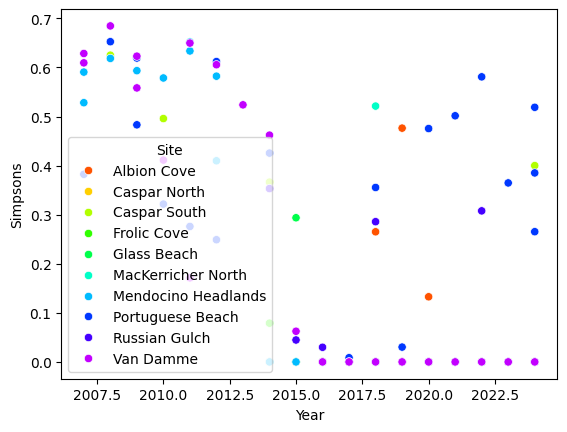

In [80]:
sns.scatterplot(ftbrgg_kelp_biodiv, x='Year', y = 'Simpsons', hue='Site', palette='gist_rainbow')

**Shows that Caspar North has only one date with biodiversity? Need to investigate further**

start_dates = pd.date_range(start='2007-01-01', end='2024-12-31', freq='A-JAN')
##the line above will allow me to add lines at the start of every year
(ggplot(ftbrgg_kelp_biodiv, aes('Date',"Simpsons",color='Site'))
+geom_point()
+theme(axis_text_x = element_text(angle=90, hjust=1))
+facet_wrap('Site', nrow=5)
+ scale_x_date(
    breaks=pd.date_range(start='2007-01-01', end='2024-12-31', freq='Q'))
 + geom_vline(xintercept=start_dates, color='grey', linetype='solid', size=.5)
+theme(figure_size=(15,15))

).draw()


In [81]:
ftbrgg_kelp_biodiv[ftbrgg_kelp_biodiv.Site == 'Caspar North']

Site   Latitude       Date  Year  Total_Count_Site  Simpsons
233  Caspar North  39.364647 2014-09-06  2014             120.0       0.0
234  Caspar North  39.364647 2015-08-08  2015               0.0       0.0
235  Caspar North  39.364647 2016-07-10  2016               0.0       0.0
236  Caspar North  39.364647 2017-06-07  2017               0.0       0.0
237  Caspar North  39.364647 2018-08-18  2018               0.0       0.0
238  Caspar North  39.364647 2019-08-10  2019               1.0       0.0
239  Caspar North  39.364647 2020-07-31  2020               0.0       0.0
240  Caspar North  39.364647 2020-10-10  2020               0.0       0.0
241  Caspar North  39.364647 2021-08-01  2021               0.0       0.0
242  Caspar North  39.364647 2022-04-29  2022               0.0       0.0
243  Caspar North  39.364647 2022-07-10  2022               0.0       0.0
244  Caspar North  39.364647 2022-10-06  2022               0.0       0.0
245  Caspar North  39.364647 2023-04-06  2023               0.0       0.0
246  Caspar North  39.364647 2023-07-20  2023               0.0       0.0
247  Caspar North  39.364647 2023-11-01  2023               0.0       0.0
248  Caspar North  39.364647 2024-04-19  2024               0.0       0.0
249  Caspar North  39.364647 2024-08-05  2024               0.0       0.0
250  Caspar North  39.364647 2024-10-26  2024               0.0       0.0

**WOW! All other years at caspar resulted in no kelp found, and the one year they found kelp there was only 1 species**


## Pivoting! But not really. Focusing on bull kelp counts!

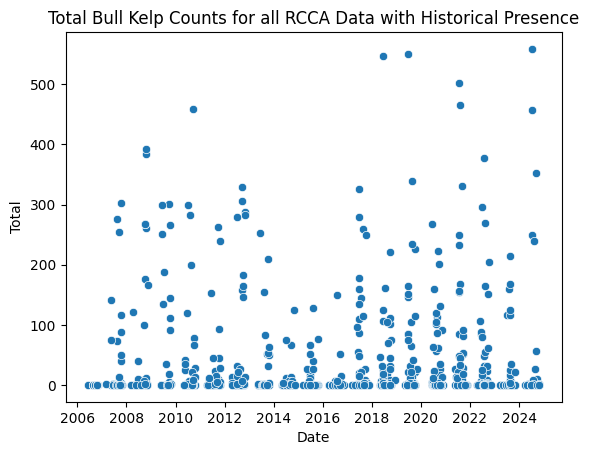

In [82]:
sns.scatterplot(kelp_rcca_group[kelp_rcca_group.Classcode=='Bull Kelp'], x='Date',y='Total')

plt.title('Total Bull Kelp Counts for all RCCA Data with Historical Presence')

plt.show()

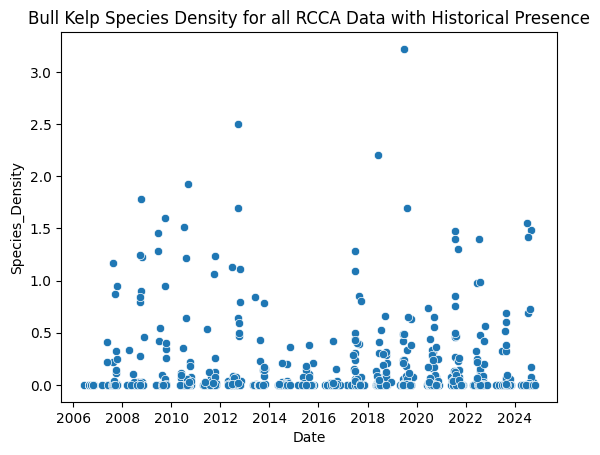

In [83]:
sns.scatterplot(kelp_rcca_group[kelp_rcca_group.Classcode=='Bull Kelp'], x='Date',y='Species_Density')

plt.title('Bull Kelp Species Density for all RCCA Data with Historical Presence')

plt.show()

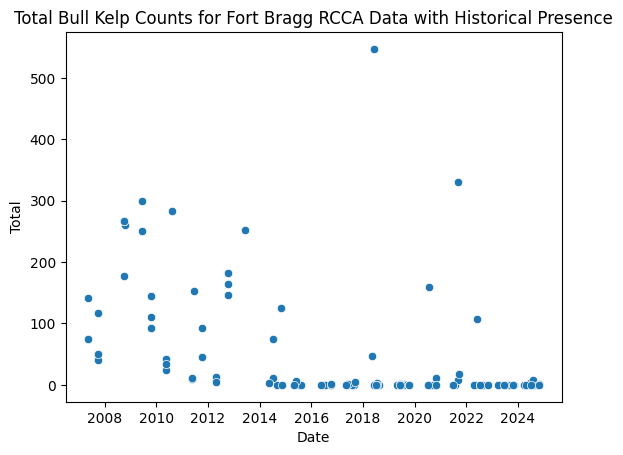

In [84]:
sns.scatterplot(ftbrgg_kelpdensity[ftbrgg_kelpdensity.Classcode=='Bull Kelp'], x='Date',y='Total')

plt.title('Total Bull Kelp Counts for Fort Bragg RCCA Data with Historical Presence')

plt.show()

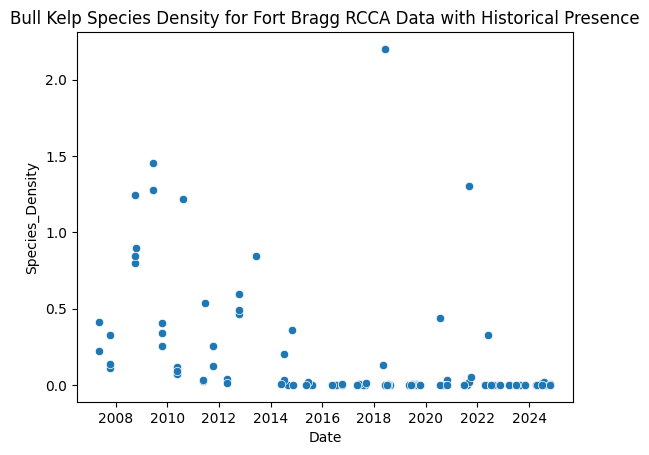

In [85]:
sns.scatterplot(ftbrgg_kelpdensity[ftbrgg_kelpdensity.Classcode=='Bull Kelp'], x='Date',y='Species_Density')

plt.title('Bull Kelp Species Density for Fort Bragg RCCA Data with Historical Presence')

plt.show()

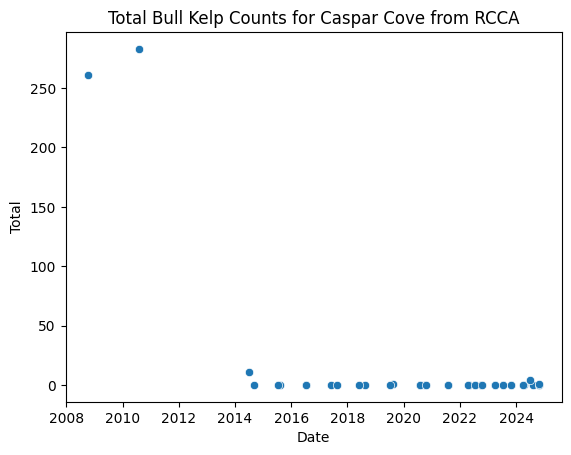

In [86]:
sns.scatterplot(ftbrgg_kelpdensity[(ftbrgg_kelpdensity.Classcode=='Bull Kelp')&(ftbrgg_kelpdensity.Site.str.contains('Caspar'))], x='Date',y='Total')

plt.title('Total Bull Kelp Counts for Caspar Cove from RCCA')

plt.show()

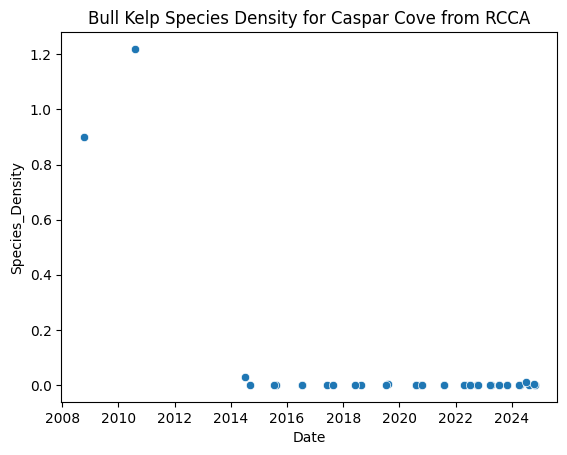

In [87]:
sns.scatterplot(ftbrgg_kelpdensity[(ftbrgg_kelpdensity.Classcode=='Bull Kelp')&(ftbrgg_kelpdensity.Site.str.contains('Caspar'))], x='Date',y='Species_Density')

plt.title('Bull Kelp Species Density for Caspar Cove from RCCA')

plt.show()

In [88]:
kelp_rcca[(kelp_rcca.Classcode=='Bull Kelp')&(kelp_rcca.Site.str.contains('Caspar'))].Date.sort_values().unique()

<DatetimeArray>
['2008-10-11 00:00:00', '2010-08-07 00:00:00', '2014-07-06 00:00:00',
 '2014-09-06 00:00:00', '2015-07-18 00:00:00', '2015-08-08 00:00:00',
 '2016-07-09 00:00:00', '2016-07-10 00:00:00', '2017-06-07 00:00:00',
 '2017-08-21 00:00:00', '2018-06-02 00:00:00', '2018-08-18 00:00:00',
 '2019-07-12 00:00:00', '2019-08-10 00:00:00', '2020-07-29 00:00:00',
 '2020-07-31 00:00:00', '2020-10-10 00:00:00', '2020-10-20 00:00:00',
 '2021-07-31 00:00:00', '2021-08-01 00:00:00', '2022-04-18 00:00:00',
 '2022-04-29 00:00:00', '2022-07-10 00:00:00', '2022-10-06 00:00:00',
 '2022-10-13 00:00:00', '2023-03-27 00:00:00', '2023-04-06 00:00:00',
 '2023-07-15 00:00:00', '2023-07-20 00:00:00', '2023-10-30 00:00:00',
 '2023-11-01 00:00:00', '2024-04-02 00:00:00', '2024-04-19 00:00:00',
 '2024-06-30 00:00:00', '2024-08-05 00:00:00', '2024-10-20 00:00:00',
 '2024-10-26 00:00:00']
Length: 37, dtype: datetime64[ns]

**Wow! Big big between 2010 and 2014 that would provide some good data. Investigate the individual sites further to get approximations of trends**

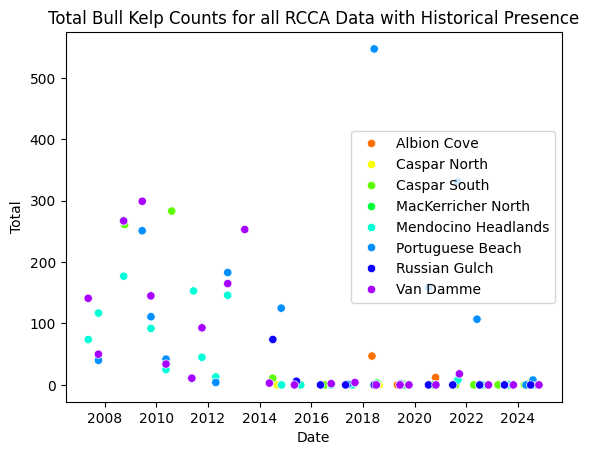

In [89]:
sns.scatterplot(ftbrgg_kelpdensity[ftbrgg_kelpdensity.Classcode=='Bull Kelp'], x='Date',y='Total', hue='Site', palette='gist_rainbow')

plt.title('Total Bull Kelp Counts for all RCCA Data with Historical Presence')
plt.legend(loc='center right')

plt.show()

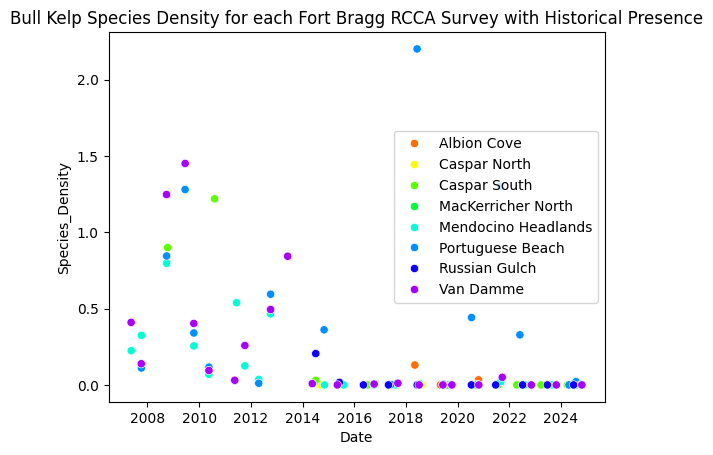

In [90]:
sns.scatterplot(ftbrgg_kelpdensity[ftbrgg_kelpdensity.Classcode=='Bull Kelp'], x='Date',y='Species_Density', hue='Site', palette='gist_rainbow')

plt.title('Bull Kelp Species Density for each Fort Bragg RCCA Survey with Historical Presence')
plt.legend(loc='center right')

plt.show()

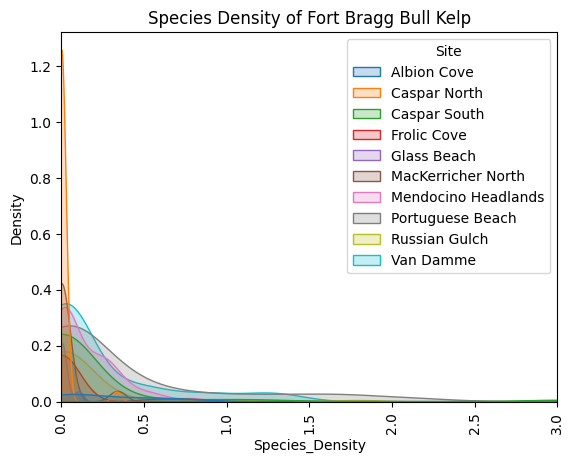

In [91]:

sns.kdeplot(ftbrgg_kelpdensity, hue='Site', x= 'Species_Density', fill=True)
plt.xticks(rotation=90)
plt.xlim((0, 3))
plt.title('Species Density of Fort Bragg Bull Kelp')
plt.show()

In [92]:
ftbrgg_kelpdensity

Site   Latitude       Date  Year   Classcode  Amount  Stipes  \
190    Albion Cove  39.227780 2018-05-08  2018   Bull Kelp      47     0.0   
197    Albion Cove  39.227780 2018-05-08  2018   Torn Kelp       0     0.0   
198    Albion Cove  39.227780 2018-05-08  2018  Woody Kelp     253     0.0   
199    Albion Cove  39.227780 2019-05-04  2019   Bull Kelp       0     0.0   
206    Albion Cove  39.227780 2019-05-04  2019   Torn Kelp      94     0.0   
...            ...        ...        ...   ...         ...     ...     ...   
10799    Van Damme  39.271915 2023-10-28  2023  Giant Kelp       0     0.0   
10806    Van Damme  39.271915 2023-10-28  2023  Woody Kelp       0     0.0   
10807    Van Damme  39.271915 2024-10-24  2024   Bull Kelp       0     0.0   
10809    Van Damme  39.271915 2024-10-24  2024  Giant Kelp       0     0.0   
10816    Van Damme  39.271915 2024-10-24  2024  Woody Kelp       0     0.0   

       Total  Distance  Area_m2  Species_Density  Dateordinal  
190     47.0     180.0    360.0         0.130556       736822  
197      0.0     180.0    360.0         0.000000       736822  
198    253.0     156.1    312.2         0.810378       736822  
199      0.0     180.0    360.0         0.000000       737183  
206     94.0     168.0    336.0         0.279762       737183  
...      ...       ...      ...              ...          ...  
10799    0.0     180.0    360.0         0.000000       738821  
10806    0.0     180.0    360.0         0.000000       738821  
10807    0.0     180.0    360.0         0.000000       739183  
10809    0.0     180.0    360.0         0.000000       739183  
10816    0.0     180.0    360.0         0.000000       739183  

[409 rows x 12 columns]

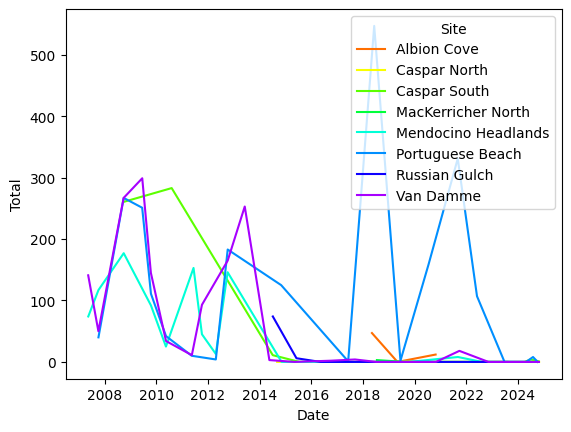

In [93]:

sns.lineplot(ftbrgg_kelpdensity[ftbrgg_kelpdensity.Classcode=='Bull Kelp'], x='Date',y='Total', hue='Site', palette='gist_rainbow')
plt.show()

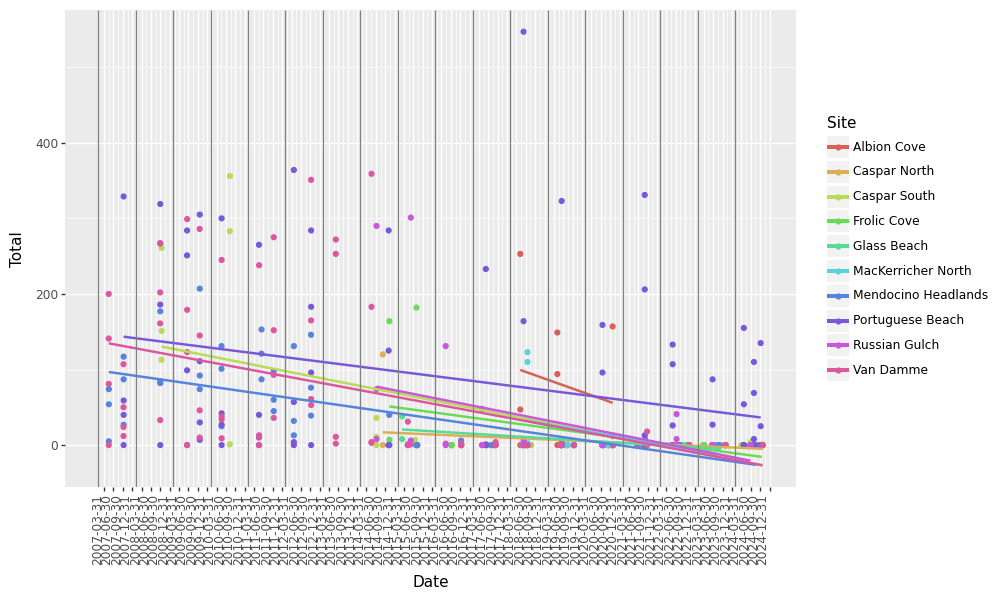

In [94]:
start_dates = pd.date_range(start='2007-01-01', end='2024-12-31', freq='A-JAN')
## the line above will allow me to add lines at the start of every year


(ggplot(ftbrgg_kelpdensity, aes('Date',"Total",color='Site'))
+geom_point()
+theme(axis_text_x = element_text(angle=90, hjust=1))
 + geom_smooth(method='lm', se=False)
+ scale_x_date(
    breaks=pd.date_range(start='2007-01-01', end='2024-12-31', freq='Q'))
 + geom_vline(xintercept=start_dates, color='grey', linetype='solid', size=.5)
+theme(figure_size=(10,6))

).draw()


## Overall! Negative trend in bullkelp

## What about the sites most similar to Caspar?

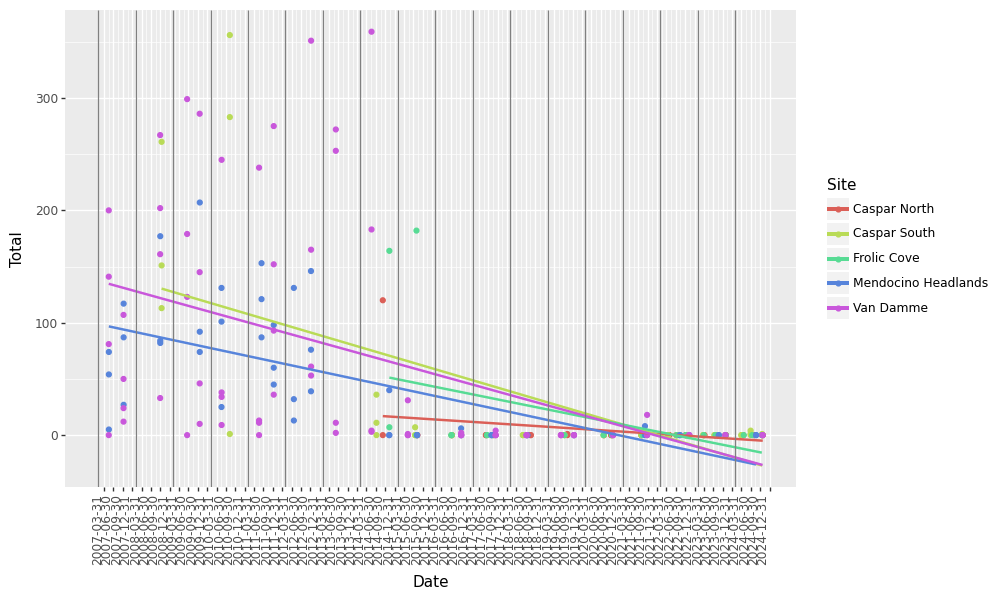

In [95]:
start_dates = pd.date_range(start='2007-01-01', end='2024-12-31', freq='A-JAN')
## the line above will allow me to add lines at the start of every year


(ggplot(ftbrgg_kelpdensity[ftbrgg_kelpdensity.Site.str.contains(r'Caspar|Van|Mendocino|Frolic',regex=True)], aes('Date',"Total",color='Site'))
+geom_point()
+theme(axis_text_x = element_text(angle=90, hjust=1))
 + geom_smooth(method='lm', se=False)
+ scale_x_date(
    breaks=pd.date_range(start='2007-01-01', end='2024-12-31', freq='Q'))
 + geom_vline(xintercept=start_dates, color='grey', linetype='solid', size=.5)
+theme(figure_size=(10,6))

).draw()


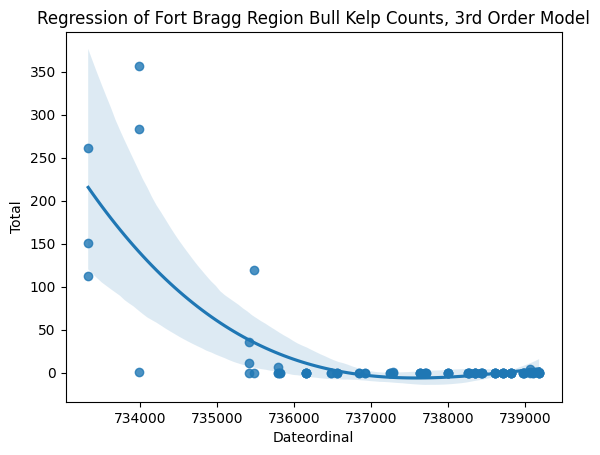

In [96]:
regplot = sns.regplot(ftbrgg_kelpdensity[ftbrgg_kelpdensity.Site.str.contains('Caspar')],x='Dateordinal',y='Total', order=3)
plt.title('Regression of Fort Bragg Region Bull Kelp Counts, 3rd Order Model')

plt.show()

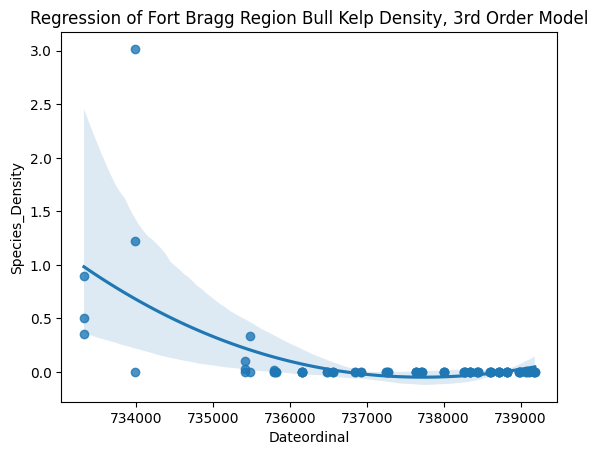

In [97]:
regplot = sns.regplot(ftbrgg_kelpdensity[ftbrgg_kelpdensity.Site.str.contains('Caspar')],x='Dateordinal',y='Species_Density', order=3)
plt.title('Regression of Fort Bragg Region Bull Kelp Density, 3rd Order Model')

plt.show()

In [98]:
ftbrgg_kelpdensity

Site   Latitude       Date  Year   Classcode  Amount  Stipes  \
190    Albion Cove  39.227780 2018-05-08  2018   Bull Kelp      47     0.0   
197    Albion Cove  39.227780 2018-05-08  2018   Torn Kelp       0     0.0   
198    Albion Cove  39.227780 2018-05-08  2018  Woody Kelp     253     0.0   
199    Albion Cove  39.227780 2019-05-04  2019   Bull Kelp       0     0.0   
206    Albion Cove  39.227780 2019-05-04  2019   Torn Kelp      94     0.0   
...            ...        ...        ...   ...         ...     ...     ...   
10799    Van Damme  39.271915 2023-10-28  2023  Giant Kelp       0     0.0   
10806    Van Damme  39.271915 2023-10-28  2023  Woody Kelp       0     0.0   
10807    Van Damme  39.271915 2024-10-24  2024   Bull Kelp       0     0.0   
10809    Van Damme  39.271915 2024-10-24  2024  Giant Kelp       0     0.0   
10816    Van Damme  39.271915 2024-10-24  2024  Woody Kelp       0     0.0   

       Total  Distance  Area_m2  Species_Density  Dateordinal  
190     47.0     180.0    360.0         0.130556       736822  
197      0.0     180.0    360.0         0.000000       736822  
198    253.0     156.1    312.2         0.810378       736822  
199      0.0     180.0    360.0         0.000000       737183  
206     94.0     168.0    336.0         0.279762       737183  
...      ...       ...      ...              ...          ...  
10799    0.0     180.0    360.0         0.000000       738821  
10806    0.0     180.0    360.0         0.000000       738821  
10807    0.0     180.0    360.0         0.000000       739183  
10809    0.0     180.0    360.0         0.000000       739183  
10816    0.0     180.0    360.0         0.000000       739183  

[409 rows x 12 columns]

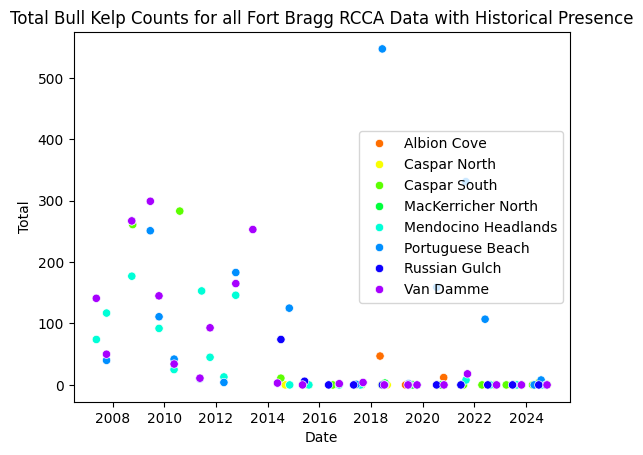

In [99]:
sns.scatterplot(ftbrgg_kelpdensity[ftbrgg_kelpdensity.Classcode=='Bull Kelp'], x='Date',y='Total', hue='Site', palette='gist_rainbow')

plt.title('Total Bull Kelp Counts for all Fort Bragg RCCA Data with Historical Presence')
plt.legend(loc='center right')

plt.show()

In [100]:
ftbrgg_bullkelp = ftbrgg_kelpdensity[ftbrgg_kelpdensity.Classcode=='Bull Kelp']

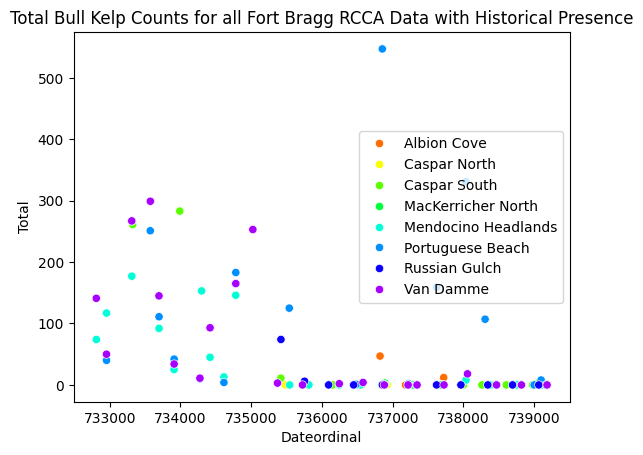

In [101]:
sns.scatterplot(ftbrgg_bullkelp, x='Dateordinal',y='Total', hue='Site', palette='gist_rainbow')

plt.title('Total Bull Kelp Counts for all Fort Bragg RCCA Data with Historical Presence')
plt.legend(loc='center right')

plt.show()

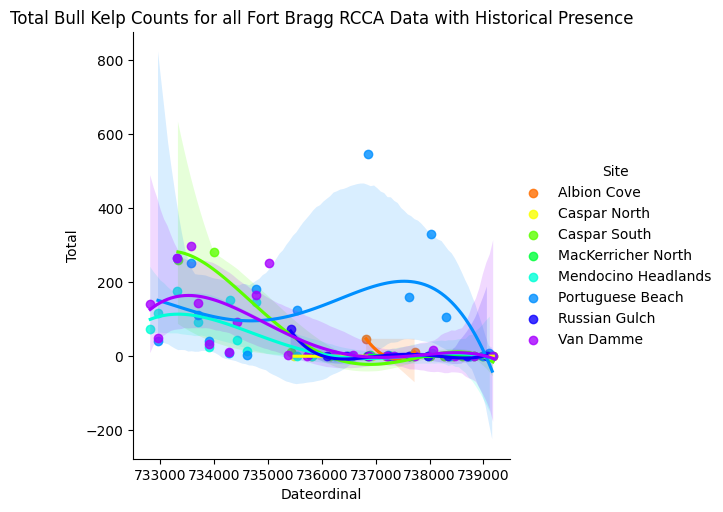

In [102]:
sns.lmplot(data=ftbrgg_bullkelp, x='Dateordinal', y='Total', hue='Site', 
           palette='gist_rainbow', order=4)

plt.title('Total Bull Kelp Counts for all Fort Bragg RCCA Data with Historical Presence')
plt.show()

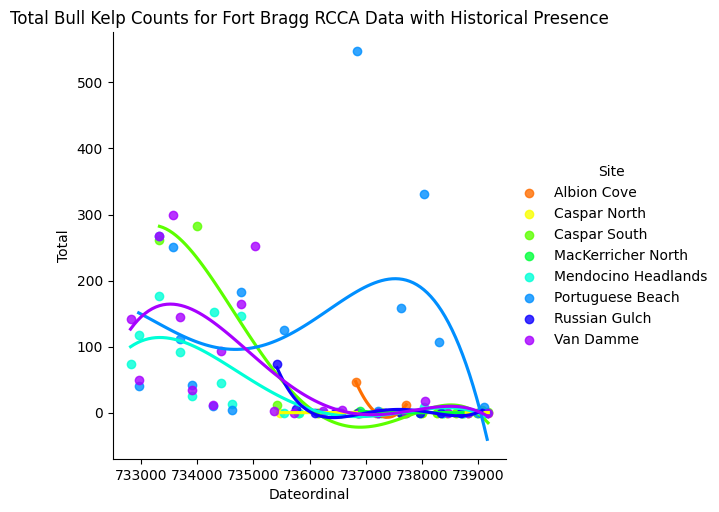

In [103]:
sns.lmplot(data=ftbrgg_bullkelp, x='Dateordinal', y='Total', hue='Site', 
           palette='gist_rainbow', order=4, ci=None)

plt.title('Total Bull Kelp Counts for Fort Bragg RCCA Data with Historical Presence')
plt.show()

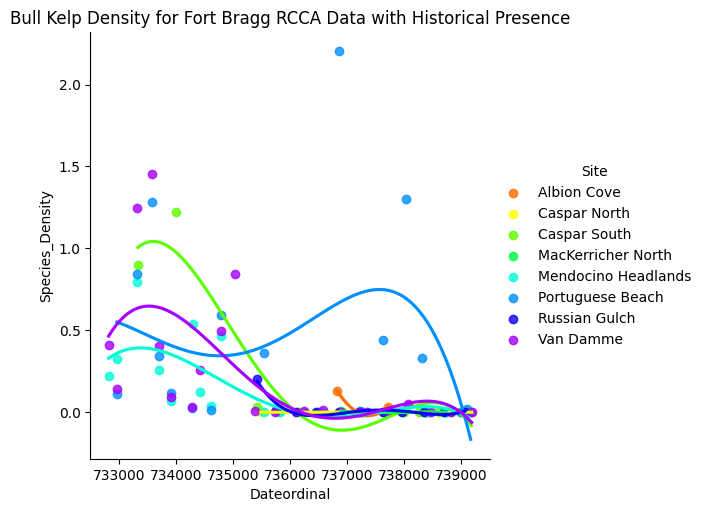

In [104]:

sns.lmplot(data=ftbrgg_bullkelp, x='Dateordinal', y='Species_Density', hue='Site', 
           palette='gist_rainbow', order=4, ci=None)

plt.title('Bull Kelp Density for Fort Bragg RCCA Data with Historical Presence')
plt.show()



In [105]:
bullkelp_rcca = kelp_rcca_group[kelp_rcca_group.Classcode.str.contains('Bull')]
bullkelp_rcca

Site   Latitude       Date  Year  Classcode  Amount  Stipes  \
140     Albion Cove  39.227780 2018-05-08  2018  Bull Kelp      47     0.0   
143     Albion Cove  39.227780 2019-05-04  2019  Bull Kelp       0     0.0   
146     Albion Cove  39.227780 2020-10-24  2020  Bull Kelp      12     0.0   
149   Andrew Molera  36.278454 2015-06-23  2015  Bull Kelp       3     0.0   
154   Andrew Molera  36.278454 2017-06-27  2017  Bull Kelp       0     0.0   
...             ...        ...        ...   ...        ...     ...     ...   
6732    White Rocks  35.527756 2018-06-21  2018  Bull Kelp      18     0.0   
6736    White Rocks  35.527756 2019-06-20  2019  Bull Kelp     151     0.0   
6740    White Rocks  35.527756 2021-09-17  2021  Bull Kelp      92     0.0   
6744    White Rocks  35.527756 2022-06-23  2022  Bull Kelp      24     0.0   
6749    White Rocks  35.527756 2023-08-22  2023  Bull Kelp       3     0.0   

      Total  Distance  Area_m2  Species_Density  Dateordinal  \
140    47.0     180.0    360.0         0.130556       736822   
143     0.0     180.0    360.0         0.000000       737183   
146    12.0     180.0    360.0         0.033333       737722   
149     3.0     180.0    360.0         0.008333       735772   
154     0.0     180.0    360.0         0.000000       736507   
...     ...       ...      ...              ...          ...   
6732   18.0     180.0    360.0         0.050000       736866   
6736  151.0     153.6    307.2         0.491536       737230   
6740   92.0     180.0    360.0         0.255556       738050   
6744   24.0     180.0    360.0         0.066667       738329   
6749    3.0     180.0    360.0         0.008333       738754   

      Total_Count_Site     n_n1   pi_lnpi  species_presence  
140              300.0   2162.0 -0.290403              True  
143              243.0     -0.0       NaN             False  
146              169.0    132.0 -0.187810              True  
149             1295.0      6.0 -0.014056              True  
154             2368.0     -0.0       NaN             False  
...                ...      ...       ...               ...  
6732             659.0    306.0 -0.098340              True  
6736             663.0  22650.0 -0.336959              True  
6740             826.0   8372.0 -0.244458              True  
6744             383.0    552.0 -0.173576              True  
6749             529.0      6.0 -0.029333              True  

[821 rows x 16 columns]

In [106]:
nobull_yesbull = bullkelp_rcca.groupby('Site')['Total'].sum()>100

lotsofbull = bullkelp_rcca[bullkelp_rcca['Site'].isin(nobull_yesbull[nobull_yesbull].index)]

In [107]:
lotsofbull

Site   Latitude       Date  Year  Classcode  Amount  Stipes  \
149   Andrew Molera  36.278454 2015-06-23  2015  Bull Kelp       3     0.0   
154   Andrew Molera  36.278454 2017-06-27  2017  Bull Kelp       0     0.0   
159   Andrew Molera  36.278454 2018-06-19  2018  Bull Kelp       0     0.0   
165   Andrew Molera  36.278454 2019-06-18  2019  Bull Kelp      85     0.0   
171   Andrew Molera  36.278454 2021-08-24  2021  Bull Kelp      22     0.0   
...             ...        ...        ...   ...        ...     ...     ...   
6732    White Rocks  35.527756 2018-06-21  2018  Bull Kelp      18     0.0   
6736    White Rocks  35.527756 2019-06-20  2019  Bull Kelp     151     0.0   
6740    White Rocks  35.527756 2021-09-17  2021  Bull Kelp      92     0.0   
6744    White Rocks  35.527756 2022-06-23  2022  Bull Kelp      24     0.0   
6749    White Rocks  35.527756 2023-08-22  2023  Bull Kelp       3     0.0   

      Total  Distance  Area_m2  Species_Density  Dateordinal  \
149     3.0     180.0    360.0         0.008333       735772   
154     0.0     180.0    360.0         0.000000       736507   
159     0.0     180.0    360.0         0.000000       736864   
165    85.0     180.0    360.0         0.236111       737228   
171    22.0     180.0    360.0         0.061111       738026   
...     ...       ...      ...              ...          ...   
6732   18.0     180.0    360.0         0.050000       736866   
6736  151.0     153.6    307.2         0.491536       737230   
6740   92.0     180.0    360.0         0.255556       738050   
6744   24.0     180.0    360.0         0.066667       738329   
6749    3.0     180.0    360.0         0.008333       738754   

      Total_Count_Site     n_n1   pi_lnpi  species_presence  
149             1295.0      6.0 -0.014056              True  
154             2368.0     -0.0       NaN             False  
159             1936.0     -0.0       NaN             False  
165              877.0   7140.0 -0.226200              True  
171             1916.0    462.0 -0.051291              True  
...                ...      ...       ...               ...  
6732             659.0    306.0 -0.098340              True  
6736             663.0  22650.0 -0.336959              True  
6740             826.0   8372.0 -0.244458              True  
6744             383.0    552.0 -0.173576              True  
6749             529.0      6.0 -0.029333              True  

[494 rows x 16 columns]

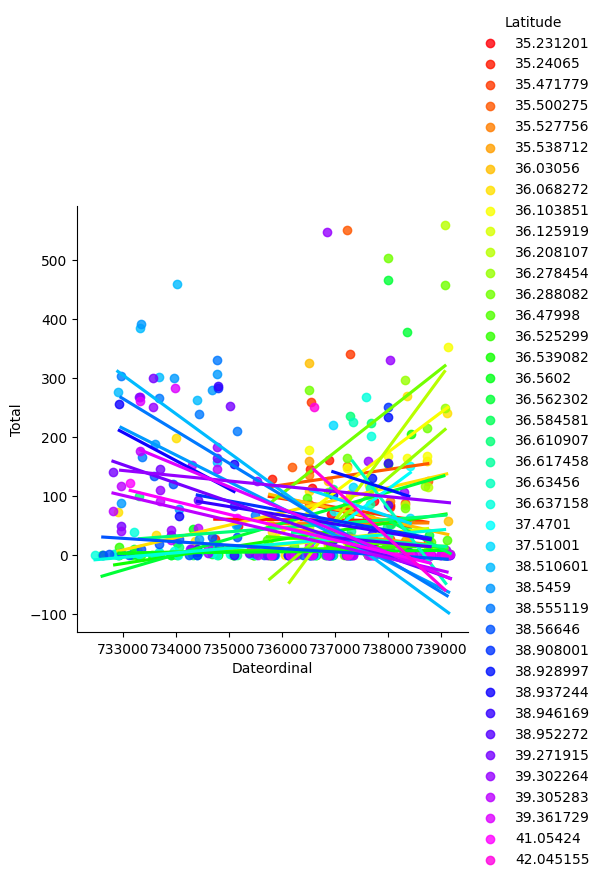

In [108]:
sns.lmplot(lotsofbull, x='Dateordinal',y='Total', hue='Latitude', palette='gist_rainbow', ci=None)

In [109]:
melted_kelp

Site   Latitude       Date  Year Ecological_Parameter     Value
0        120 Reef  33.737919 2006-10-01  2006             Simpsons  0.000000
1        120 Reef  33.737919 2007-08-19  2007             Simpsons  0.030502
2        120 Reef  33.737919 2008-08-23  2008             Simpsons  0.000000
3        120 Reef  33.737919 2009-06-07  2009             Simpsons  0.020410
4        120 Reef  33.737919 2010-08-01  2010             Simpsons  0.364641
...           ...        ...        ...   ...                  ...       ...
4756  Yellowbanks  33.998798 2009-10-29  2009             Richness  3.000000
4757  Yellowbanks  33.998798 2010-11-17  2010             Richness  4.000000
4758  Yellowbanks  33.998798 2011-08-19  2011             Richness  3.000000
4759  Yellowbanks  33.998798 2012-07-24  2012             Richness  3.000000
4760  Yellowbanks  33.998798 2013-11-07  2013             Richness  4.000000

[4761 rows x 6 columns]

# Have ecological parameters, now need to standardize them!

take standardize_list() function from analysis 1

In [110]:
eco_kelp

Site   Latitude       Date  Year  Total_Count_Site  Simpsons  \
0        120 Reef  33.737919 2006-10-01  2006              63.0  0.000000   
1        120 Reef  33.737919 2007-08-19  2007             260.0  0.030502   
2        120 Reef  33.737919 2008-08-23  2008             713.0  0.000000   
3        120 Reef  33.737919 2009-06-07  2009            1070.0  0.020410   
4        120 Reef  33.737919 2010-08-01  2010             651.0  0.364641   
...           ...        ...        ...   ...               ...       ...   
1582  Yellowbanks  33.998798 2009-10-29  2009             614.0  0.521603   
1583  Yellowbanks  33.998798 2010-11-17  2010            1150.0  0.332471   
1584  Yellowbanks  33.998798 2011-08-19  2011             908.0  0.525786   
1585  Yellowbanks  33.998798 2012-07-24  2012            1263.0  0.365035   
1586  Yellowbanks  33.998798 2013-11-07  2013            1034.0  0.597593   

       Shannon  Richness  
0     0.000000         1  
1     0.088138         3  
2     0.000000         1  
3     0.063310         3  
4     0.639033         4  
...        ...       ...  
1582  0.834675         3  
1583  0.588510         4  
1584  0.873590         3  
1585  0.663190         3  
1586  1.047876         4  

[1587 rows x 8 columns]

In [111]:
def standardize_list(dataframe,list_of_columns):
    dataframe1 = dataframe.copy()
    for column in list_of_columns:
        standardized = (dataframe1[column] - dataframe1[column].mean())/dataframe1[column].std()
        column_name = 'std_'+column
        if column_name not in dataframe.columns:
            dataframe1[column_name] = standardized
    return dataframe1

eco_kelp_std = standardize_list(eco_kelp, ['Simpsons','Shannon','Richness'])
eco_kelp_std

Site   Latitude       Date  Year  Total_Count_Site  Simpsons  \
0        120 Reef  33.737919 2006-10-01  2006              63.0  0.000000   
1        120 Reef  33.737919 2007-08-19  2007             260.0  0.030502   
2        120 Reef  33.737919 2008-08-23  2008             713.0  0.000000   
3        120 Reef  33.737919 2009-06-07  2009            1070.0  0.020410   
4        120 Reef  33.737919 2010-08-01  2010             651.0  0.364641   
...           ...        ...        ...   ...               ...       ...   
1582  Yellowbanks  33.998798 2009-10-29  2009             614.0  0.521603   
1583  Yellowbanks  33.998798 2010-11-17  2010            1150.0  0.332471   
1584  Yellowbanks  33.998798 2011-08-19  2011             908.0  0.525786   
1585  Yellowbanks  33.998798 2012-07-24  2012            1263.0  0.365035   
1586  Yellowbanks  33.998798 2013-11-07  2013            1034.0  0.597593   

       Shannon  Richness  std_Simpsons  std_Shannon  std_Richness  
0     0.000000         1     -1.025408    -1.041572     -1.018754  
1     0.088138         3     -0.903931    -0.840117      0.174869  
2     0.000000         1     -1.025408    -1.041572     -1.018754  
3     0.063310         3     -0.944121    -0.896867      0.174869  
4     0.639033         4      0.426823     0.419042      0.771681  
...        ...       ...           ...          ...           ...  
1582  0.834675         3      1.051943     0.866213      0.174869  
1583  0.588510         4      0.298699     0.303563      0.771681  
1584  0.873590         3      1.068602     0.955159      0.174869  
1585  0.663190         3      0.428392     0.474257      0.174869  
1586  1.047876         4      1.354582     1.353518      0.771681  

[1587 rows x 11 columns]

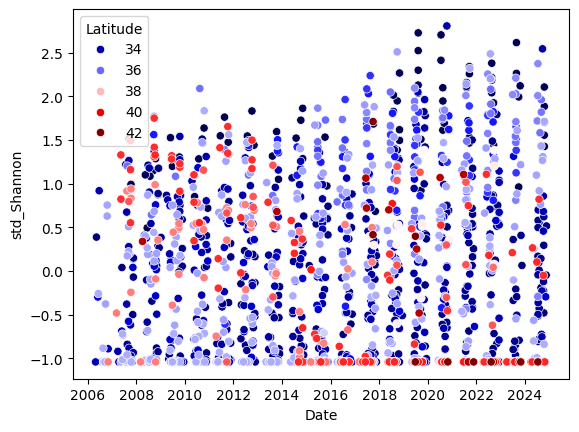

In [112]:
sns.scatterplot(eco_kelp_std.sort_values('Latitude'), x='Date', y= 'std_Shannon', hue='Latitude', palette='seismic')
plt.show()

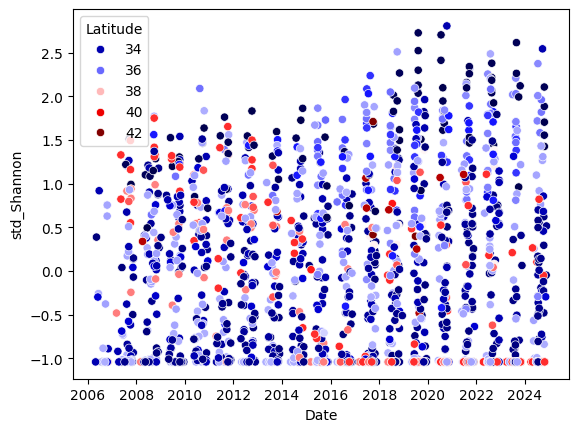

In [113]:
sns.scatterplot(eco_kelp_std, x='Date', y= 'std_Shannon', hue='Latitude', palette='seismic')
plt.show()

**import ```eco_invert_std.csv``` into this analysis to merge and compare**

In [114]:
eco_invert_std = pd.read_csv('eco_invert_std.csv')
eco_invert_std

Site   Latitude        Date  Year Month  Day Month_Day  \
0        120 Reef  33.737919  2006-10-01  2006   Oct    1    Oct-01   
1        120 Reef  33.737919  2007-08-19  2007   Aug   19    Aug-19   
2        120 Reef  33.737919  2008-08-23  2008   Aug   23    Aug-23   
3        120 Reef  33.737919  2009-06-07  2009   Jun    7    Jun-07   
4        120 Reef  33.737919  2010-08-01  2010   Aug    1    Aug-01   
...           ...        ...         ...   ...   ...  ...       ...   
1583  Yellowbanks  33.998798  2009-10-29  2009   Oct   29    Oct-29   
1584  Yellowbanks  33.998798  2010-11-17  2010   Nov   17    Nov-17   
1585  Yellowbanks  33.998798  2011-08-19  2011   Aug   19    Aug-19   
1586  Yellowbanks  33.998798  2012-07-24  2012   Jul   24    Jul-24   
1587  Yellowbanks  33.998798  2013-11-07  2013   Nov    7    Nov-07   

      Dateordinal  DayofYear  Total_Count_Site  Simpsons   Shannon  Richness  \
0          732585        274               805  0.704441  1.461121        11   
1          732907        231               969  0.798118  1.890908        15   
2          733277        236               730  0.734495  1.601857        13   
3          733565        158               622  0.834693  1.985561        16   
4          733985        213               768  0.740690  1.687840        14   
...           ...        ...               ...       ...       ...       ...   
1583       733709        302               211  0.730761  1.626985        12   
1584       734093        321               192  0.698080  1.473937         9   
1585       734368        231               374  0.668005  1.558280        13   
1586       734708        206               267  0.814959  2.014998        14   
1587       735179        311               198  0.695431  1.449828        10   

      std_Simpsons  std_Shannon  std_Richness  
0         0.566938     0.344281     -0.107075  
1         1.174410     1.512614      1.400993  
2         0.761831     0.726857      0.646959  
3         1.411588     1.769918      1.778010  
4         0.802008     0.960595      1.023976  
...            ...          ...           ...  
1583      0.737616     0.795167      0.269942  
1584      0.525693     0.379120     -0.861108  
1585      0.330661     0.608398      0.646959  
1586      1.283620     1.849940      1.023976  
1587      0.508517     0.313584     -0.484092  

[1588 rows x 16 columns]

In [115]:
eco_kelp_std.Date.unique()

<DatetimeArray>
['2006-10-01 00:00:00', '2007-08-19 00:00:00', '2008-08-23 00:00:00',
 '2009-06-07 00:00:00', '2010-08-01 00:00:00', '2011-09-17 00:00:00',
 '2012-06-09 00:00:00', '2013-06-15 00:00:00', '2014-06-14 00:00:00',
 '2015-08-21 00:00:00',
 ...
 '2017-07-25 00:00:00', '2021-09-17 00:00:00', '2022-06-23 00:00:00',
 '2020-08-16 00:00:00', '2021-08-08 00:00:00', '2020-07-19 00:00:00',
 '2008-11-04 00:00:00', '2009-04-19 00:00:00', '2009-10-29 00:00:00',
 '2011-08-19 00:00:00']
Length: 989, dtype: datetime64[ns]

In [116]:
eco_invert_std.Date.unique()

array(['2006-10-01', '2007-08-19', '2008-08-23', '2009-06-07',
       '2010-08-01', '2011-09-17', '2012-06-09', '2013-06-15',
       '2014-06-14', '2015-08-21', '2016-08-20', '2017-07-18',
       '2018-07-10', '2019-06-13', '2020-09-20', '2021-10-31',
       '2022-07-28', '2024-07-19', '2007-09-29', '2008-08-09',
       '2010-07-10', '2016-10-12', '2018-11-02', '2018-05-08',
       '2019-05-04', '2020-10-24', '2015-06-23', '2017-06-27',
       '2018-06-19', '2019-06-18', '2021-08-24', '2022-06-22',
       '2023-07-01', '2024-07-15', '2007-05-19', '2007-07-28',
       '2007-10-02', '2008-05-17', '2008-10-04', '2009-05-24',
       '2009-10-17', '2010-10-23', '2011-05-14', '2012-05-05',
       '2013-06-22', '2014-05-10', '2015-05-30', '2016-05-14',
       '2017-05-13', '2017-10-01', '2018-05-12', '2019-05-05',
       '2020-08-19', '2021-06-12', '2022-07-03', '2023-05-21',
       '2024-06-30', '2019-10-03', '2020-08-25', '2021-08-23',
       '2022-08-13', '2023-08-12', '2024-07-28', '2018-

In [117]:
eco_invert_std.dtypes
## in download and reupload, datetime object return to reg objects

Site                 object
Latitude            float64
Date                 object
Year                  int64
Month                object
Day                   int64
Month_Day            object
Dateordinal           int64
DayofYear             int64
Total_Count_Site      int64
Simpsons            float64
Shannon             float64
Richness              int64
std_Simpsons        float64
std_Shannon         float64
std_Richness        float64
dtype: object

In [118]:
eco_invert_std['Date'] = pd.to_datetime(eco_invert_std['Date'])
eco_invert_std

Site   Latitude       Date  Year Month  Day Month_Day  \
0        120 Reef  33.737919 2006-10-01  2006   Oct    1    Oct-01   
1        120 Reef  33.737919 2007-08-19  2007   Aug   19    Aug-19   
2        120 Reef  33.737919 2008-08-23  2008   Aug   23    Aug-23   
3        120 Reef  33.737919 2009-06-07  2009   Jun    7    Jun-07   
4        120 Reef  33.737919 2010-08-01  2010   Aug    1    Aug-01   
...           ...        ...        ...   ...   ...  ...       ...   
1583  Yellowbanks  33.998798 2009-10-29  2009   Oct   29    Oct-29   
1584  Yellowbanks  33.998798 2010-11-17  2010   Nov   17    Nov-17   
1585  Yellowbanks  33.998798 2011-08-19  2011   Aug   19    Aug-19   
1586  Yellowbanks  33.998798 2012-07-24  2012   Jul   24    Jul-24   
1587  Yellowbanks  33.998798 2013-11-07  2013   Nov    7    Nov-07   

      Dateordinal  DayofYear  Total_Count_Site  Simpsons   Shannon  Richness  \
0          732585        274               805  0.704441  1.461121        11   
1          732907        231               969  0.798118  1.890908        15   
2          733277        236               730  0.734495  1.601857        13   
3          733565        158               622  0.834693  1.985561        16   
4          733985        213               768  0.740690  1.687840        14   
...           ...        ...               ...       ...       ...       ...   
1583       733709        302               211  0.730761  1.626985        12   
1584       734093        321               192  0.698080  1.473937         9   
1585       734368        231               374  0.668005  1.558280        13   
1586       734708        206               267  0.814959  2.014998        14   
1587       735179        311               198  0.695431  1.449828        10   

      std_Simpsons  std_Shannon  std_Richness  
0         0.566938     0.344281     -0.107075  
1         1.174410     1.512614      1.400993  
2         0.761831     0.726857      0.646959  
3         1.411588     1.769918      1.778010  
4         0.802008     0.960595      1.023976  
...            ...          ...           ...  
1583      0.737616     0.795167      0.269942  
1584      0.525693     0.379120     -0.861108  
1585      0.330661     0.608398      0.646959  
1586      1.283620     1.849940      1.023976  
1587      0.508517     0.313584     -0.484092  

[1588 rows x 16 columns]

In [119]:
eco_invert_std['Date'].unique()

<DatetimeArray>
['2006-10-01 00:00:00', '2007-08-19 00:00:00', '2008-08-23 00:00:00',
 '2009-06-07 00:00:00', '2010-08-01 00:00:00', '2011-09-17 00:00:00',
 '2012-06-09 00:00:00', '2013-06-15 00:00:00', '2014-06-14 00:00:00',
 '2015-08-21 00:00:00',
 ...
 '2017-07-25 00:00:00', '2021-09-17 00:00:00', '2022-06-23 00:00:00',
 '2020-08-16 00:00:00', '2021-08-08 00:00:00', '2020-07-19 00:00:00',
 '2008-11-04 00:00:00', '2009-04-19 00:00:00', '2009-10-29 00:00:00',
 '2011-08-19 00:00:00']
Length: 989, dtype: datetime64[ns]

In [120]:
eco_kelp_std['Date'].unique()== eco_invert_std['Date'].unique()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

**Great! Data frames contain the same unique dates, one for one, likely from same surveys**

In [121]:
eco_std = eco_invert_std.merge(eco_kelp_std, on=['Site','Latitude','Date', 'Year'], how ='left')

eco_std

Site   Latitude       Date  Year Month  Day Month_Day  \
0        120 Reef  33.737919 2006-10-01  2006   Oct    1    Oct-01   
1        120 Reef  33.737919 2007-08-19  2007   Aug   19    Aug-19   
2        120 Reef  33.737919 2008-08-23  2008   Aug   23    Aug-23   
3        120 Reef  33.737919 2009-06-07  2009   Jun    7    Jun-07   
4        120 Reef  33.737919 2010-08-01  2010   Aug    1    Aug-01   
...           ...        ...        ...   ...   ...  ...       ...   
1583  Yellowbanks  33.998798 2009-10-29  2009   Oct   29    Oct-29   
1584  Yellowbanks  33.998798 2010-11-17  2010   Nov   17    Nov-17   
1585  Yellowbanks  33.998798 2011-08-19  2011   Aug   19    Aug-19   
1586  Yellowbanks  33.998798 2012-07-24  2012   Jul   24    Jul-24   
1587  Yellowbanks  33.998798 2013-11-07  2013   Nov    7    Nov-07   

      Dateordinal  DayofYear  Total_Count_Site_x  ...  std_Simpsons_x  \
0          732585        274                 805  ...        0.566938   
1          732907        231                 969  ...        1.174410   
2          733277        236                 730  ...        0.761831   
3          733565        158                 622  ...        1.411588   
4          733985        213                 768  ...        0.802008   
...           ...        ...                 ...  ...             ...   
1583       733709        302                 211  ...        0.737616   
1584       734093        321                 192  ...        0.525693   
1585       734368        231                 374  ...        0.330661   
1586       734708        206                 267  ...        1.283620   
1587       735179        311                 198  ...        0.508517   

      std_Shannon_x  std_Richness_x  Total_Count_Site_y  Simpsons_y  \
0          0.344281       -0.107075                63.0    0.000000   
1          1.512614        1.400993               260.0    0.030502   
2          0.726857        0.646959               713.0    0.000000   
3          1.769918        1.778010              1070.0    0.020410   
4          0.960595        1.023976               651.0    0.364641   
...             ...             ...                 ...         ...   
1583       0.795167        0.269942               614.0    0.521603   
1584       0.379120       -0.861108              1150.0    0.332471   
1585       0.608398        0.646959               908.0    0.525786   
1586       1.849940        1.023976              1263.0    0.365035   
1587       0.313584       -0.484092              1034.0    0.597593   

      Shannon_y  Richness_y  std_Simpsons_y  std_Shannon_y  std_Richness_y  
0      0.000000         1.0       -1.025408      -1.041572       -1.018754  
1      0.088138         3.0       -0.903931      -0.840117        0.174869  
2      0.000000         1.0       -1.025408      -1.041572       -1.018754  
3      0.063310         3.0       -0.944121      -0.896867        0.174869  
4      0.639033         4.0        0.426823       0.419042        0.771681  
...         ...         ...             ...            ...             ...  
1583   0.834675         3.0        1.051943       0.866213        0.174869  
1584   0.588510         4.0        0.298699       0.303563        0.771681  
1585   0.873590         3.0        1.068602       0.955159        0.174869  
1586   0.663190         3.0        0.428392       0.474257        0.174869  
1587   1.047876         4.0        1.354582       1.353518        0.771681  

[1588 rows x 23 columns]

In [122]:
def rename(dataframe, x_value_name, y_value_name):
    column_names = []
    for i in dataframe.columns:
        if re.search('_x', i):
            name = re.sub('x', x_value_name, i)
        elif re.search('_y', i):
            name = re.sub('y', y_value_name, i)
        else:
            name = i
        column_names.append(name)
    dataframe.columns = column_names
    return dataframe


In [123]:
eco_std = rename(eco_std, 'Invert', 'Kelp')

In [124]:
eco_std.columns

Index(['Site', 'Latitude', 'Date', 'Year', 'Month', 'Day', 'Month_Day',
       'Dateordinal', 'DayofYear', 'Total_Count_Site_Invert',
       'Simpsons_Invert', 'Shannon_Invert', 'Richness_Invert',
       'std_Simpsons_Invert', 'std_Shannon_Invert', 'std_Richness_Invert',
       'Total_Count_Site_Kelp', 'Simpsons_Kelp', 'Shannon_Kelp',
       'Richness_Kelp', 'std_Simpsons_Kelp', 'std_Shannon_Kelp',
       'std_Richness_Kelp'],
      dtype='object')

In [125]:
##sns.pairplot(eco_std)
##plt.show();

In [126]:
eco_std.isna().sum()

Site                       0
Latitude                   0
Date                       0
Year                       0
Month                      0
Day                        0
Month_Day                  0
Dateordinal                0
DayofYear                  0
Total_Count_Site_Invert    0
Simpsons_Invert            2
Shannon_Invert             0
Richness_Invert            0
std_Simpsons_Invert        2
std_Shannon_Invert         0
std_Richness_Invert        0
Total_Count_Site_Kelp      1
Simpsons_Kelp              1
Shannon_Kelp               1
Richness_Kelp              1
std_Simpsons_Kelp          1
std_Shannon_Kelp           1
std_Richness_Kelp          1
dtype: int64

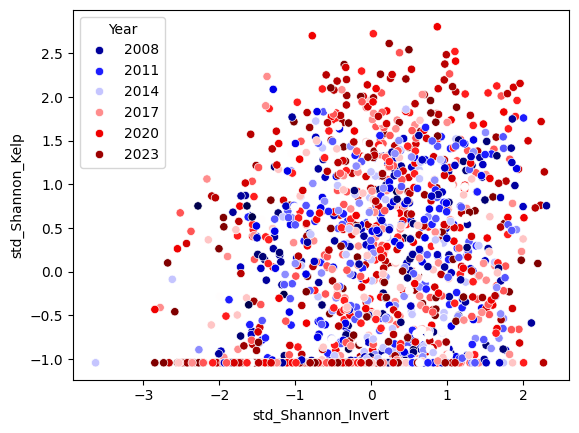

In [127]:


sns.scatterplot(eco_std, x='std_Shannon_Invert', y='std_Shannon_Kelp', hue='Year', palette='seismic')
plt.show()

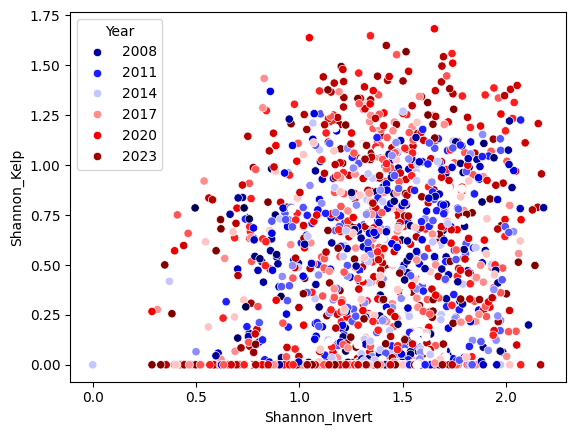

In [128]:
sns.scatterplot(eco_std, x='Shannon_Invert', y='Shannon_Kelp', hue='Year', palette='seismic')
plt.show()

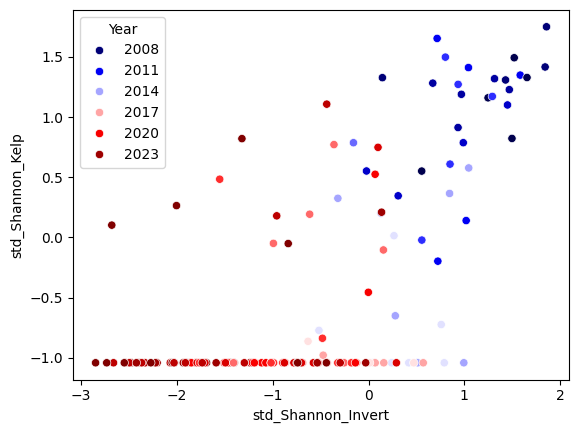

In [129]:
sns.scatterplot(eco_std[(eco_std.Latitude>=39)&(eco_std.Latitude<=40)], x='std_Shannon_Invert', y='std_Shannon_Kelp', hue='Year', palette='seismic')

plt.show()

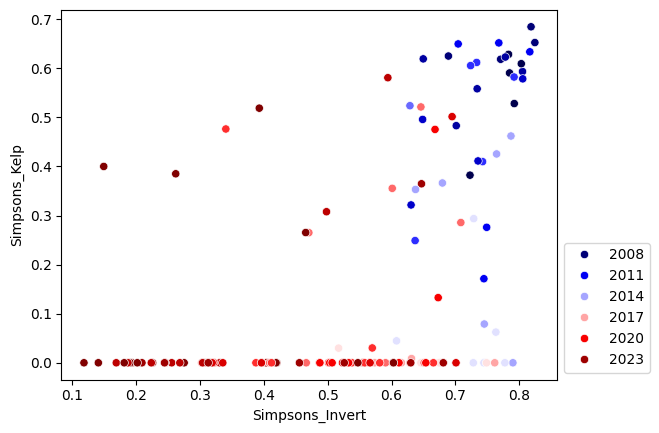

In [130]:
sns.scatterplot(eco_std[(eco_std.Latitude>=39)&(eco_std.Latitude<=40)], x='Simpsons_Invert', y='Simpsons_Kelp', hue='Year', palette='seismic')
plt.legend(bbox_to_anchor=(1,0), loc='lower left')
plt.show()

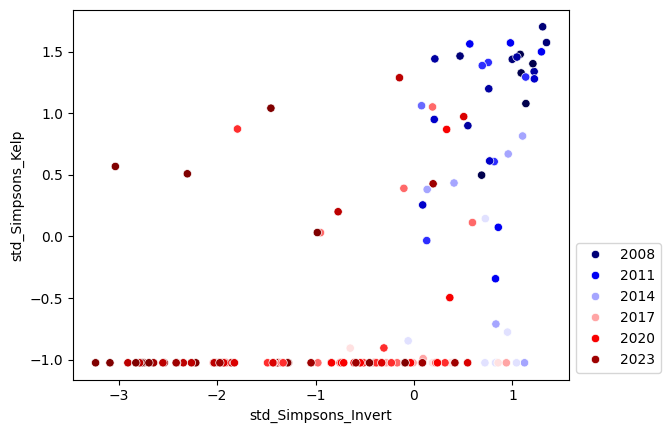

In [131]:
sns.scatterplot(eco_std[(eco_std.Latitude>=39)&(eco_std.Latitude<=40)], x='std_Simpsons_Invert', y='std_Simpsons_Kelp', hue='Year', palette='seismic')
plt.legend(bbox_to_anchor=(1,0), loc='lower left')
plt.show()

In [132]:
eco_std[eco_std.Richness_Invert==3]

Site   Latitude       Date  Year Month  Day Month_Day  \
110       Blue Cavern  33.441500 2017-10-10  2017   Oct   10    Oct-10   
797   Long Point West  33.410526 2018-09-06  2018   Sep    6    Sep-06   
1481       Twin Rocks  33.417910 2018-09-05  2018   Sep    5    Sep-05   

      Dateordinal  DayofYear  Total_Count_Site_Invert  ...  \
110        736612        283                      244  ...   
797        736943        249                       79  ...   
1481       736942        248                      111  ...   

      std_Simpsons_Invert  std_Shannon_Invert  std_Richness_Invert  \
110             -3.094502           -2.777906             -3.12321   
797             -1.206065           -1.553456             -3.12321   
1481            -1.972371           -2.210624             -3.12321   

      Total_Count_Site_Kelp  Simpsons_Kelp  Shannon_Kelp  Richness_Kelp  \
110                   240.0       0.146409      0.276729            2.0   
797                     0.0       0.000000      0.000000            0.0   
1481                    1.0       0.000000      0.000000            1.0   

      std_Simpsons_Kelp  std_Shannon_Kelp  std_Richness_Kelp  
110           -0.442317         -0.409062          -0.421942  
797           -1.025408         -1.041572          -1.615566  
1481          -1.025408         -1.041572          -1.018754  

[3 rows x 23 columns]

In [144]:
eco_std.to_csv('eco_std.csv', index=False)
eco_kelp_std.to_csv('eco_kelp_std.csv', index=False)

# Import new module to start t-tests

In [133]:
from scipy.stats import ttest_ind
## https://docs.scipy.org/doc/scipy/tutorial/stats/comparing_two_samples.html

In [134]:
pre2016_eco_std = eco_std[eco_std.Year<2016]['std_Shannon_Invert']
post2022_eco_std = eco_std[eco_std.Year>=2022]['std_Shannon_Invert']

t_stat, p_value = ttest_ind(pre2016_eco_std, post2022_eco_std, equal_var=False)

In [135]:
print(t_stat, p_value)

5.107378053129962 4.82473979687974e-07


In [136]:
## Strong statistical difference between before and after 2016
t_stat, p_value = ttest_ind(eco_std[eco_std.Year<2016]['std_Shannon_Invert'], eco_std[eco_std.Year>2016]['std_Shannon_Invert'], equal_var=False)
print(t_stat, p_value)

5.03981513129752 5.227727557674015e-07


In [137]:
eco_std[eco_std.Year<2016]['std_Shannon_Invert'].mean()

np.float64(0.1424802816962933)

In [138]:
eco_std[eco_std.Year>2016]['std_Shannon_Invert'].mean()

np.float64(-0.11461704053415016)

In [139]:
## https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.friedmanchisquare.html#scipy.stats.friedmanchisquare
## this might be useful, mean for repeated samples

In [140]:
t_stat_kelp, p_value_kelp = ttest_ind(eco_std[eco_std.Year<2016]['std_Shannon_Kelp'].dropna(), eco_std[eco_std.Year>2016]['std_Shannon_Kelp'].dropna(), equal_var=False)
print(t_stat_kelp, p_value_kelp)

##had to drop na

-1.1344398039824608 0.25679148384715544


In [141]:
t_stat_kelp, p_value_kelp = ttest_ind(eco_std[eco_std.Year<2016]['std_Shannon_Kelp'].dropna(), eco_std[eco_std.Year>2021]['std_Shannon_Kelp'].dropna(), equal_var=False)
print(t_stat_kelp, p_value_kelp)

##had to drop na

-0.5237659492711261 0.6007125089090237


In [142]:
eco_std[eco_std.Year<2016]['std_Shannon_Kelp']

0      -1.041572
1      -0.840117
2      -1.041572
3      -0.896867
4       0.419042
          ...   
1583    0.866213
1584    0.303563
1585    0.955159
1586    0.474257
1587    1.353518
Name: std_Shannon_Kelp, Length: 682, dtype: float64

In [143]:
eco_std.dropna()

Site   Latitude       Date  Year Month  Day Month_Day  \
0        120 Reef  33.737919 2006-10-01  2006   Oct    1    Oct-01   
1        120 Reef  33.737919 2007-08-19  2007   Aug   19    Aug-19   
2        120 Reef  33.737919 2008-08-23  2008   Aug   23    Aug-23   
3        120 Reef  33.737919 2009-06-07  2009   Jun    7    Jun-07   
4        120 Reef  33.737919 2010-08-01  2010   Aug    1    Aug-01   
...           ...        ...        ...   ...   ...  ...       ...   
1583  Yellowbanks  33.998798 2009-10-29  2009   Oct   29    Oct-29   
1584  Yellowbanks  33.998798 2010-11-17  2010   Nov   17    Nov-17   
1585  Yellowbanks  33.998798 2011-08-19  2011   Aug   19    Aug-19   
1586  Yellowbanks  33.998798 2012-07-24  2012   Jul   24    Jul-24   
1587  Yellowbanks  33.998798 2013-11-07  2013   Nov    7    Nov-07   

      Dateordinal  DayofYear  Total_Count_Site_Invert  ...  \
0          732585        274                      805  ...   
1          732907        231                      969  ...   
2          733277        236                      730  ...   
3          733565        158                      622  ...   
4          733985        213                      768  ...   
...           ...        ...                      ...  ...   
1583       733709        302                      211  ...   
1584       734093        321                      192  ...   
1585       734368        231                      374  ...   
1586       734708        206                      267  ...   
1587       735179        311                      198  ...   

      std_Simpsons_Invert  std_Shannon_Invert  std_Richness_Invert  \
0                0.566938            0.344281            -0.107075   
1                1.174410            1.512614             1.400993   
2                0.761831            0.726857             0.646959   
3                1.411588            1.769918             1.778010   
4                0.802008            0.960595             1.023976   
...                   ...                 ...                  ...   
1583             0.737616            0.795167             0.269942   
1584             0.525693            0.379120            -0.861108   
1585             0.330661            0.608398             0.646959   
1586             1.283620            1.849940             1.023976   
1587             0.508517            0.313584            -0.484092   

      Total_Count_Site_Kelp  Simpsons_Kelp  Shannon_Kelp  Richness_Kelp  \
0                      63.0       0.000000      0.000000            1.0   
1                     260.0       0.030502      0.088138            3.0   
2                     713.0       0.000000      0.000000            1.0   
3                    1070.0       0.020410      0.063310            3.0   
4                     651.0       0.364641      0.639033            4.0   
...                     ...            ...           ...            ...   
1583                  614.0       0.521603      0.834675            3.0   
1584                 1150.0       0.332471      0.588510            4.0   
1585                  908.0       0.525786      0.873590            3.0   
1586                 1263.0       0.365035      0.663190            3.0   
1587                 1034.0       0.597593      1.047876            4.0   

      std_Simpsons_Kelp  std_Shannon_Kelp  std_Richness_Kelp  
0             -1.025408         -1.041572          -1.018754  
1             -0.903931         -0.840117           0.174869  
2             -1.025408         -1.041572          -1.018754  
3             -0.944121         -0.896867           0.174869  
4              0.426823          0.419042           0.771681  
...                 ...               ...                ...  
1583           1.051943          0.866213           0.174869  
1584           0.298699          0.303563           0.771681  
1585           1.068602          0.955159           0.174869  
1586           0.428392          0.474257           0.1

In [146]:
kelp_rcca_group.to_csv('kelp_rcca_group.csv', index=False)